# Projeto de Machine Learning: Sistema de Intervenção Estudantil

## Índice

1. [Introdução](#Introdução)
   - [Objetivo do Projeto](#Objetivo-do-Projeto)
   - [Conjunto de Dados](#Conjunto-de-Dados)
2. [Bibliotecas Utilizadas](#Bibliotecas-Utilizadas)
3. [Exploração de Dados](#Exploração-de-Dados)
   - [Carregamento dos Dados](#Carregamento-dos-Dados)
   - [Análise de Valores Ausentes e Desconhecidos](#Análise-de-Valores-Ausentes-e-Desconhecidos)
   - [Análise da Estrutura dos Dados](#Análise-da-Estrutura-dos-Dados)
   - [Análise de Variáveis Categóricas](#Análise-de-Variáveis-Categóricas)
   - [Análise de Correlação](#Análise-de-Correlação)
   - [Análise de Outliers](#Análise-de-Outliers)
4. [Pré-processamento de Dados](#Pré-processamento-de-Dados)
   - [Codificação de Variáveis Categóricas](#Codificação-de-Variáveis-Categóricas)
   - [Divisão dos Dados](#Divisão-dos-Dados)
5. [Balanceamento de Classes](#Balanceamento-de-Classes)
   - [Análise do Desequilíbrio de Classes](#Análise-do-Desequilíbrio-de-Classes)
   - [Aplicação de Técnicas de Balanceamento](#Aplicação-de-Técnicas-de-Balanceamento)
6. [Modelação e Avaliação](#Modelação-e-Avaliação)
   - [Implementação dos Algoritmos](#Implementação-dos-Algoritmos)
   - [Validação Cruzada](#Validação-Cruzada)
   - [Curvas ROC](#Curvas-ROC)
   - [Matrizes de Confusão](#Matrizes-de-Confusão)
7. [Conclusão](#Conclusão)
   - [Características Mais Importantes](#Características-Mais-Importantes)
   -[Clustering](#Clustering)

## 1. Introdução <a name="Introdução"></a>

No âmbito da Unidade Curricular de Elementos de Inteligência Artificial e Ciência de Dados desenvolvemos um projeto de Machine Learning relacionado com um sistema de intervenção estudantil, desde a análise exploratória até à avaliação de modelos de classificação.

### Objetivo do Projeto <a name="Objetivo-do-Projeto"></a>

O objetivo principal é desenvolver um sistema capaz de prever se um estudante do ensino secundário irá reprovar no exame final, com base nas suas características demográficas, sociais e escolares. A identificação precoce de alunos em risco permite a implementação de estratégias de intervenção e apoio personalizado, contribuindo para o sucesso académico.

### Conjunto de Dados <a name="Conjunto-de-Dados"></a>

Utilizamos o conjunto de dados "Student Performance" do repositório UCI Machine Learning. Este dataset contém dados recolhidos de duas escolas secundárias em Portugal e inclui 33 atributos, como notas, tempo de estudo, atividades extracurriculares, consumo de álcool, relações familiares, entre outros. A variável alvo que pretendemos prever é "passed", indicando se o aluno foi reprovado (no) ou aprovado (yes). Neste projeto, consideramos a reprovação (no) como o resultado positivo (1) e a aprovação (yes) como o resultado negativo (0).

## 2. Bibliotecas Utilizadas <a name="Bibliotecas-Utilizadas"></a>

Para o desenvolvimento deste projeto, recorremos a várias bibliotecas Python essenciais para ciência de dados e machine learning:

- **NumPy**: Biblioteca fundamental para computação numérica em Python. Fornece suporte para arrays e matrizes multidimensionais, juntamente com uma vasta coleção de funções matemáticas de alto nível para operar nesses arrays.
- **Pandas**: Biblioteca crucial para manipulação e análise de dados. Oferece estruturas de dados como DataFrames, que são altamente eficientes para trabalhar com dados tabulares (como os do nosso ficheiro CSV), permitindo operações como leitura, escrita, limpeza, transformação e agregação de dados.
- **Matplotlib**: Biblioteca base para criação de visualizações estáticas, animadas e interativas em Python. Permite gerar uma grande variedade de gráficos e plots (linhas, barras, histogramas, dispersão, etc.) para explorar e apresentar dados.
- **Seaborn**: Construída sobre o Matplotlib, a Seaborn fornece uma interface de alto nível para desenhar gráficos estatísticos visualmente atrativos e informativos. Simplifica a criação de visualizações complexas e esteticamente agradáveis, como heatmaps, boxplots, violin plots e countplots.
- **Scikit-learn (sklearn)**: Uma das bibliotecas mais populares para machine learning em Python. Fornece ferramentas eficientes para análise de dados e modelação preditiva, incluindo algoritmos de classificação, regressão, clustering, redução de dimensionalidade, seleção de modelos e pré-processamento.
- **Warning**: Módulo nativo do Python para gerenciar avisos (warnings). Permite filtrar, ignorar ou personalizar alertas durante a execução do código, como avisos de depreciação em bibliotecas.
- **Math**: Módulo incorporado do Python que fornece acesso a funções matemáticas básicas.
- **Imbalanced-learn (imblearn)**: Uma extensão do Scikit-learn focada em lidar com conjuntos de dados desequilibrados. Fornece implementações de várias técnicas de reamostragem (over-sampling, under-sampling, combinação) para melhorar o desempenho de modelos em problemas com classes desiguais.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
import math

from utils import *


Importámos as bibliotecas principais e todas as funções do módulo utils, que contém funções para pré-processamento, balanceamento de classes, validação cruzada, treino de modelos e avaliação, o que facilita a manutenção do código e torna o notebook mais limpo e focado na análise.

Primeiramente, começamos por ler os dados com que estamos a trabalhar com o intuito de verificar se existem valores ausentes ou valores nulos, 
para que possamos proceder ao seu tratamento e fazer uma análise completa do dataset.

## 3. Exploração de Dados <a name="Exploração-de-Dados"></a>

### Carregamento dos Dados <a name="Carregamento-dos-Dados"></a>

In [2]:
df = pd.read_csv("student-data.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


### Análise de Valores Ausentes e Desconhecidos <a name="Análise-de-Valores-Ausentes-e-Desconhecidos"></a>

In [3]:
total = len(df)

unknown_counts = (df == 'Unknown').sum()

unknown_percentages = (unknown_counts / total) * 100

unknown_summary = pd.DataFrame({
    'unknown_count': unknown_counts,
    'unknown_percentage': unknown_percentages
})
unknown_summary = unknown_summary[unknown_summary['unknown_count'] > 0]

print(unknown_summary.sort_values('unknown_percentage', ascending=False))



Empty DataFrame
Columns: [unknown_count, unknown_percentage]
Index: []


In [4]:
df.isnull().sum()

missing = df.isnull().sum()
missing[missing > 0]

(df.isnull().sum() / len(df)) * 100
df[df.isnull().any(axis=1)]



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed


Após a análise inicial do conjunto de dados dos estudantes a partir do ficheiro CSV, concluimos que o dataset contém variáveis categóricas e numéricas, incluindo a variável alvo *'passed'*, que indica a aprovação ou reprovação dos alunos. Verificamos a ausência tanto de valores explicitamente marcados como *"Unknown"* quanto de valores nulos (*NaN*), o que reflete a boa qualidade inicial dos dados e simplifica o pré-processamento.

### Análise da Estrutura dos Dados <a name="Análise-da-Estrutura-dos-Dados"></a>

In [5]:
shape = df.shape
print("Number of rows: ", shape[0])
print("Number of columns: ", shape[1])

print(df.dtypes)

Number of rows:  395
Number of columns:  31
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object


### Análise de Variáveis Categóricas <a name="Análise-de-Variáveis-Categóricas"></a>

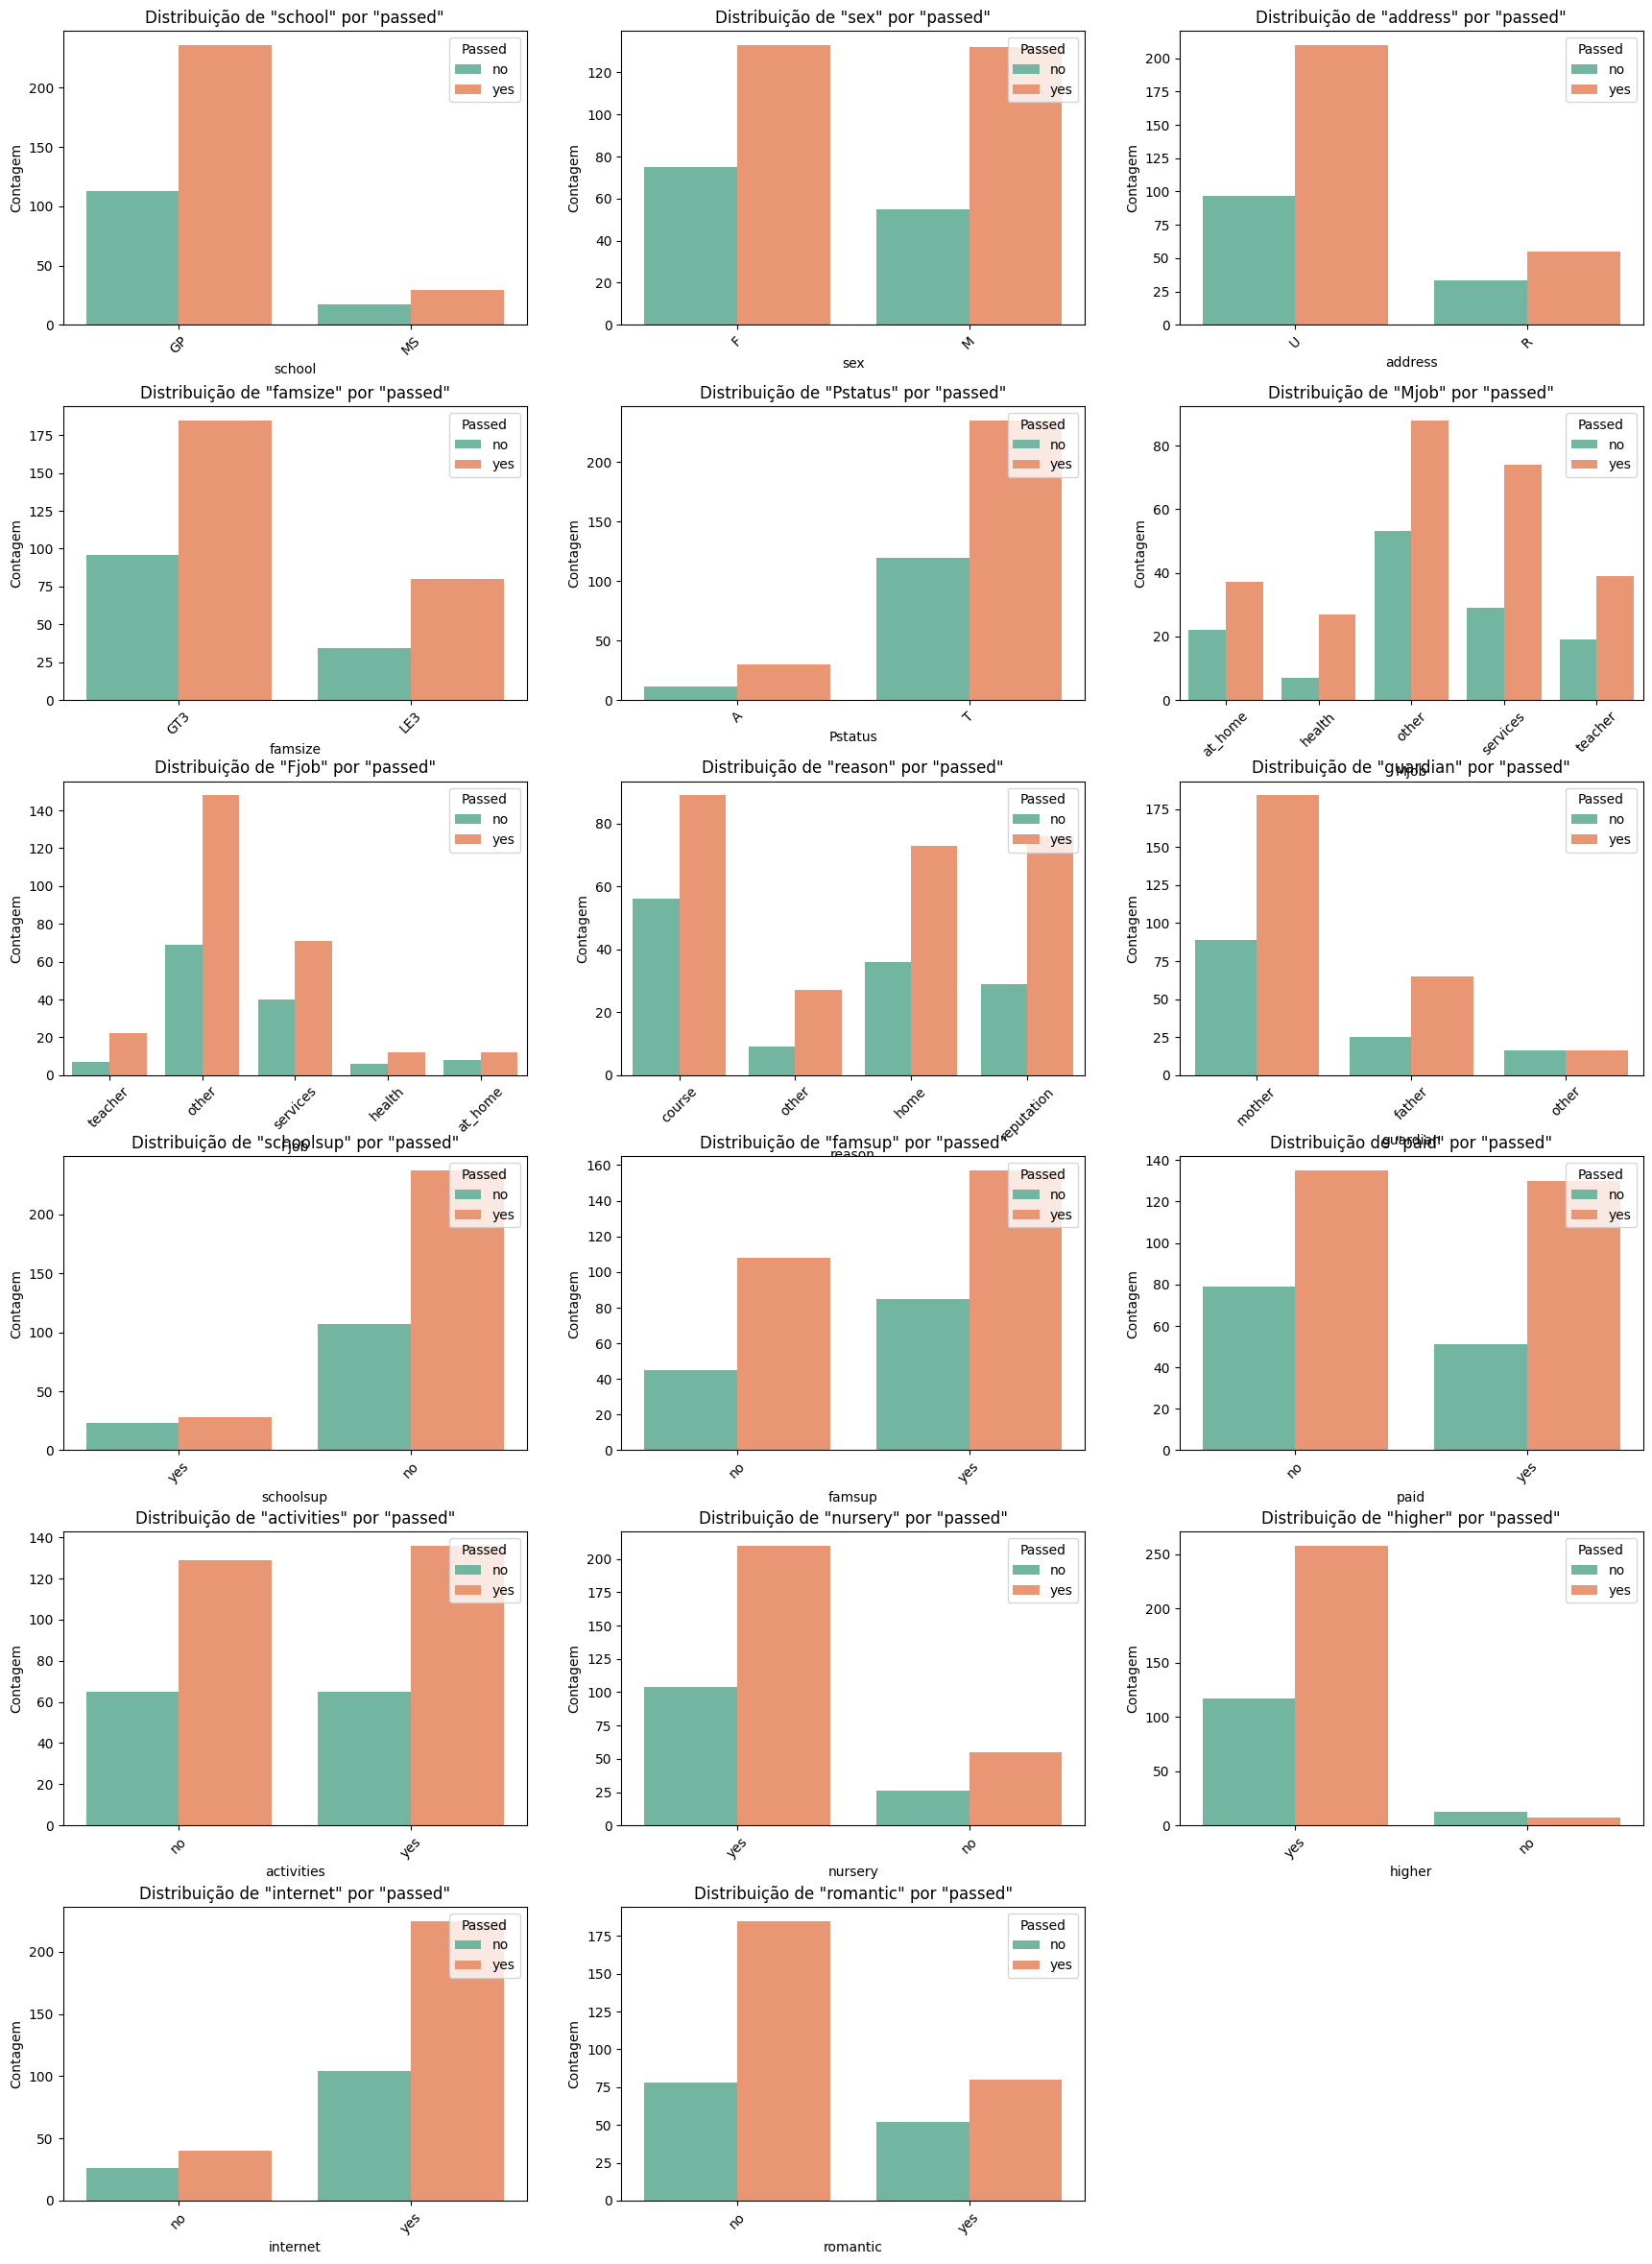

In [6]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

categorical_features = [feature for feature in categorical_features if feature != 'passed']

num_cols = 3 
num_features = len(categorical_features)
num_rows = math.ceil(num_features / num_cols)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
fig.tight_layout(pad=4.0)

for idx, feature in enumerate(categorical_features):
    row = idx // num_cols
    col = idx % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    
    # Criar o gráfico de barras
    sns.countplot(x=feature, hue='passed', data=df, palette='Set2', ax=ax)
    ax.set_title(f'Distribuição de "{feature}" por "passed"', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Contagem', fontsize=10)
    ax.legend(title='Passed', loc='upper right')
    ax.tick_params(axis='x', rotation=45)

if num_features < num_rows * num_cols:
    for idx in range(num_features, num_rows * num_cols):
        row = idx // num_cols
        col = idx % num_cols
        fig.delaxes(axs[row, col] if num_rows > 1 else axs[col])

plt.show()

Ao examinar a estrutura do conjunto de dados, identificámos o número de registos (linhas) e características (colunas), bem como os tipos de dados presentes em cada variável. O dataset inclui uma combinação de valores numéricos (*inteiros* e *floats*) e categóricos (*strings*), o que é fundamental para definir as estratégias de pré-processamento. Esta distinção permite-nos planear as transformações necessárias, como a codificação de variáveis categóricas e a normalização de valores numéricos, assegurando que os dados estejam devidamente preparados para a aplicação de algoritmos de *Machine learning*.

### Análise de Correlação <a name="Análise-de-Correlação"></a>

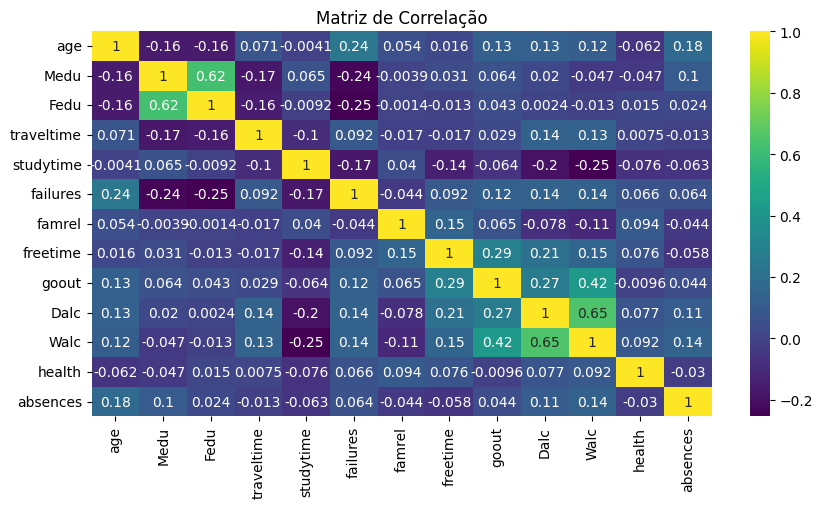

In [7]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Matriz de Correlação")
plt.show()

Desenhamos uma matriz de correlação para ajudar a identificar colunas ou variáveis que possam ser redundantes. Cada célula da matriz representa a correlação entre duas variáveis específicas. A correlação mede a força e a direção do relacionamento linear entre duas variáveis. Uma correlação próxima de 1 indica uma relação positiva, enquanto uma correlação próxima de -1 indica uma relação negativa, como é possível verificar não existe nenhuma variável redundante. Observamos algumas correlações interessantes, como a relação entre a educação da mãe e a educação do pai, ou entre o consumo de álcool durante a semana e nos fins de semana.

### Análise de Outliers <a name="Análise-de-Outliers"></a>

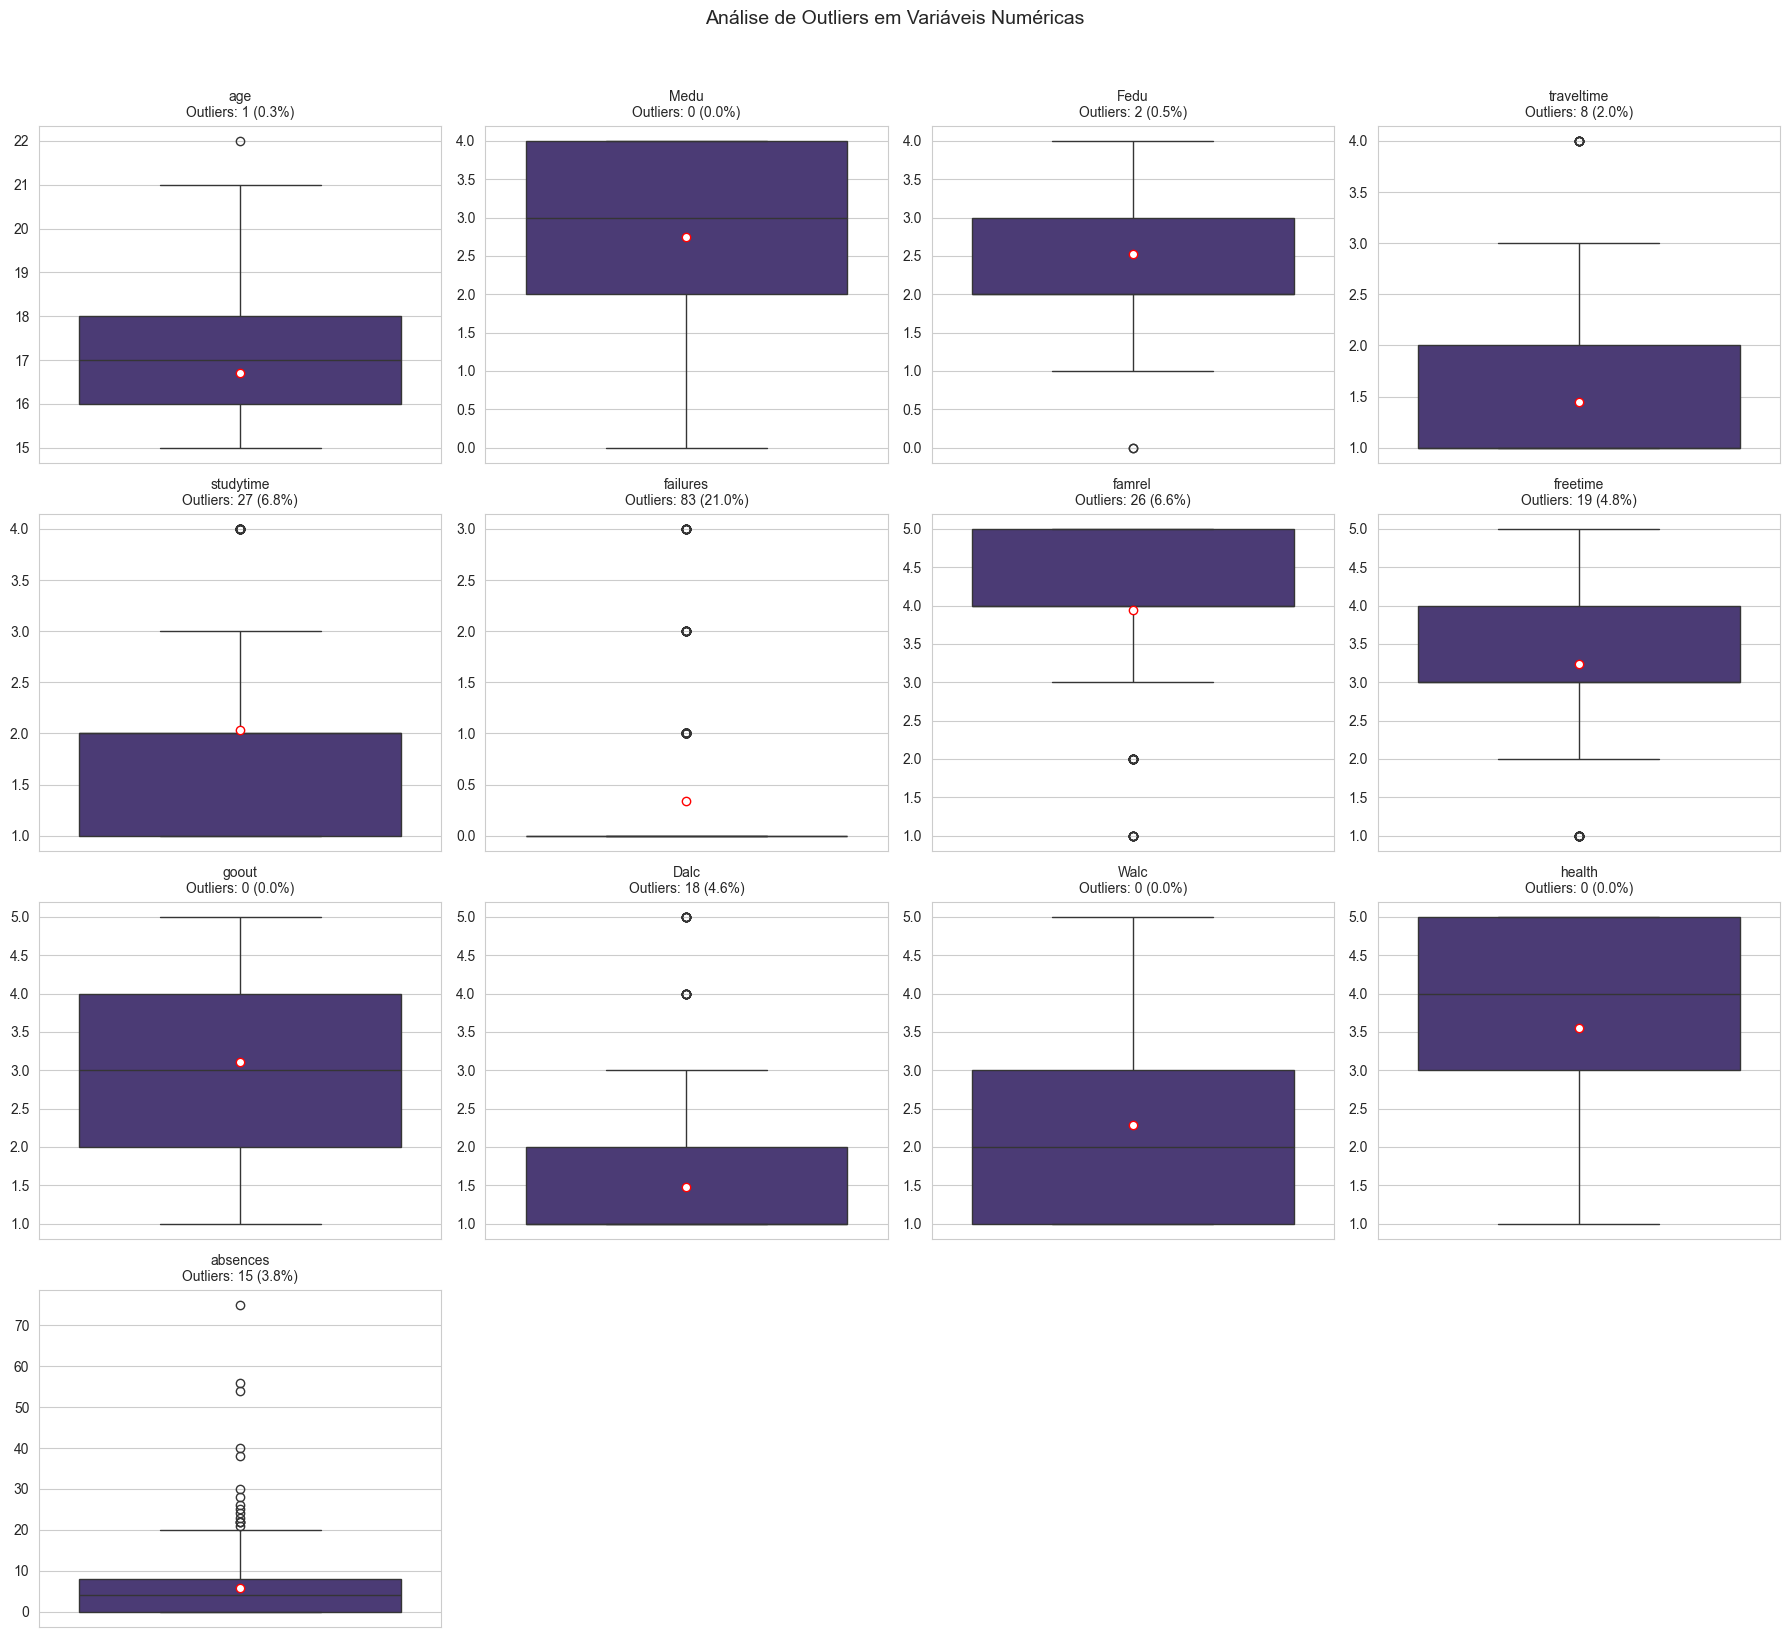

In [8]:
sns.set_style("whitegrid")  
sns.set_palette("viridis")
plt.rcParams['figure.dpi'] = 100

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

if not numeric_features:
    raise ValueError("Nenhuma variável numérica encontrada no DataFrame")

n_cols = 4
n_rows = math.ceil(len(numeric_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.suptitle('Análise de Outliers em Variáveis Numéricas', y=1.02, fontsize=14)

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

for i, feature in enumerate(numeric_features):
    ax = axes.flatten()[i] if len(numeric_features) > 1 else axes  
    
    sns.boxplot(y=df[feature], ax=ax, showmeans=True,
               meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"red"})
    
    # Detecção de outliers
    is_outlier = detect_outliers(df[feature])
    n_outliers = sum(is_outlier)
    perc_outliers = n_outliers / len(df) * 100
    
    title = f"{feature[:15]}..." if len(feature) > 15 else feature
    ax.set_title(f"{title}\nOutliers: {n_outliers} ({perc_outliers:.1f}%)", fontsize=10)
    ax.set_ylabel('')

if len(numeric_features) > 1:
    for j in range(i+1, n_rows*n_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Com isto concluímos que os valores dos outliers estão dentro do expectável.

## 4. Pré-processamento de Dados <a name="Pré-processamento-de-Dados"></a>

### Codificação de Variáveis Categóricas <a name="Codificação-de-Variáveis-Categóricas"></a>

In [9]:

df_processed = df.copy()

categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'passed' in categorical_features:
    categorical_features.remove('passed')

print(f"Colunas categóricas para codificar: {categorical_features}")

df_processed = encode_categorical_features(df_processed, method='onehot', 
                                            columns=categorical_features, 
                                            drop_first=True)

print(f"Dimensões do DataFrame após codificação: {df_processed.shape}")
df_processed.head()


Colunas categóricas para codificar: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Dimensões do DataFrame após codificação: (395, 40)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


Aplicámos a codificação one-hot às variáveis categóricas, transformando-as em formato numérico que os algoritmos de machine learning possam interpretar. Esta transformação é essencial para o próximo passo de divisão dos dados em conjuntos de treino e teste.

### Divisão dos Dados <a name="Divisão-dos-Dados"></a>

In [10]:
X = df_processed.drop('passed', axis=1)
y = df['passed'] 

y = y.map({'no': 1, 'yes': 0})

# Dividir em conjuntos de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras, {X_train.shape[1]} características")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras, {X_test.shape[1]} características")
print(f"Distribuição das classes no conjunto de treino:\n{pd.Series(y_train).value_counts()}")
print(f"Distribuição das classes no conjunto de teste:\n{pd.Series(y_test).value_counts()}")


Tamanho do conjunto de treino: 276 amostras, 39 características
Tamanho do conjunto de teste: 119 amostras, 39 características
Distribuição das classes no conjunto de treino:
passed
0    185
1     91
Name: count, dtype: int64
Distribuição das classes no conjunto de teste:
passed
0    80
1    39
Name: count, dtype: int64


Dividimos os dados pré-processados em conjuntos de treino (70%) e teste (30%). A estratificação foi usada para garantir que a proporção das classes 'passed' (mapeadas para 1 para 'no' e 0 para 'yes') seja mantida em ambos os conjuntos. Esta divisão é crucial para treinar os nossos modelos com a maioria dos dados e avaliá-los de forma imparcial em dados não vistos. Note-se que neste projeto, consideramos a reprovação (no) como o resultado positivo (1) e a aprovação (yes) como o resultado negativo (0).

## 5. Balanceamento de Classes <a name="Balanceamento-de-Classes"></a>

### Análise do Desequilíbrio de Classes <a name="Análise-do-Desequilíbrio-de-Classes"></a>

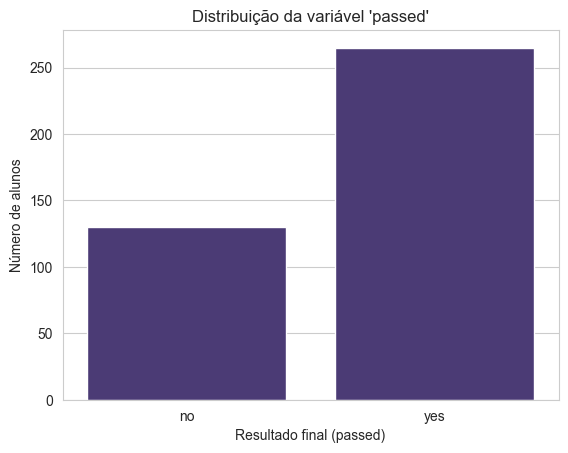

passed
yes    67.088608
no     32.911392
Name: proportion, dtype: float64


In [11]:
sns.countplot(data=df, x='passed')
plt.title("Distribuição da variável 'passed'")
plt.xlabel("Resultado final (passed)")
plt.ylabel("Número de alunos")
plt.show()

percentuais = df['passed'].value_counts(normalize=True) * 100
print(percentuais)


Analisámos o desequilíbrio de classes no conjunto de treino. Observamos que existe uma diferença significativa entre o número de alunos que foram reprovados (no) e os que foram aprovados (yes). Este desequilíbrio pode levar os modelos a terem um desempenho enviesado, favorecendo a previsão da classe maioritária. Portanto, a aplicação de técnicas de balanceamento é justificada para tentar mitigar este problema. Lembramos que neste projeto, a classe 'no' (reprovação) é considerada como positiva (1) e a classe 'yes' (aprovação) como negativa (0).

### Aplicação de Técnicas de Balanceamento <a name="Aplicação-de-Técnicas-de-Balanceamento"></a>

In [12]:
# 1. Down-sampling (Random Under-Sampling)
X_train_down, y_train_down = apply_downsampling(X_train, y_train)
print(f"Shape após Down-sampling: X={X_train_down.shape}, y={y_train_down.shape}")
print(f"Distribuição após Down-sampling:\n{pd.Series(y_train_down).value_counts()}\n")

# 2. SMOTE (Synthetic Minority Over-sampling Technique)
X_train_smote, y_train_smote = apply_smote(X_train, y_train)
print(f"Shape após SMOTE: X={X_train_smote.shape}, y={y_train_smote.shape}")
print(f"Distribuição após SMOTE:\n{pd.Series(y_train_smote).value_counts()}\n")

# 3. ADASYN (Adaptive Synthetic Sampling)
X_train_adasyn, y_train_adasyn = apply_adasyn(X_train, y_train)
print(f"Shape após ADASYN: X={X_train_adasyn.shape}, y={y_train_adasyn.shape}")
print(f"Distribuição após ADASYN:\n{pd.Series(y_train_adasyn).value_counts()}\n")

# 4. Tomek Links (Under-sampling)
X_train_tomek, y_train_tomek = apply_tomek_links(X_train, y_train)
print(f"Shape após Tomek Links: X={X_train_tomek.shape}, y={y_train_tomek.shape}")
print(f"Distribuição após Tomek Links:\n{pd.Series(y_train_tomek).value_counts()}\n")

# 5. Random Over-Sampling
X_train_ros, y_train_ros = apply_random_oversampling(X_train, y_train)
print(f"Shape após Random Over-Sampling: X={X_train_ros.shape}, y={y_train_ros.shape}")
print(f"Distribuição após Random Over-Sampling:\n{pd.Series(y_train_ros).value_counts()}\n")

# 6. SMOTE-ENN (Combinação de over-sampling e under-sampling)
X_train_smoteenn, y_train_smoteenn = apply_smote_enn(X_train, y_train)
print(f"Shape após SMOTE-ENN: X={X_train_smoteenn.shape}, y={y_train_smoteenn.shape}")
print(f"Distribuição após SMOTE-ENN:\n{pd.Series(y_train_smoteenn).value_counts()}\n")


Shape após Down-sampling: X=(182, 39), y=(182,)
Distribuição após Down-sampling:
passed
0    91
1    91
Name: count, dtype: int64

Shape após SMOTE: X=(370, 39), y=(370,)
Distribuição após SMOTE:
passed
0    185
1    185
Name: count, dtype: int64

Shape após ADASYN: X=(372, 39), y=(372,)
Distribuição após ADASYN:
passed
1    187
0    185
Name: count, dtype: int64

Shape após Tomek Links: X=(255, 39), y=(255,)
Distribuição após Tomek Links:
passed
0    164
1     91
Name: count, dtype: int64

Shape após Random Over-Sampling: X=(370, 39), y=(370,)
Distribuição após Random Over-Sampling:
passed
0    185
1    185
Name: count, dtype: int64

Shape após SMOTE-ENN: X=(160, 39), y=(160,)
Distribuição após SMOTE-ENN:
passed
1    120
0     40
Name: count, dtype: int64



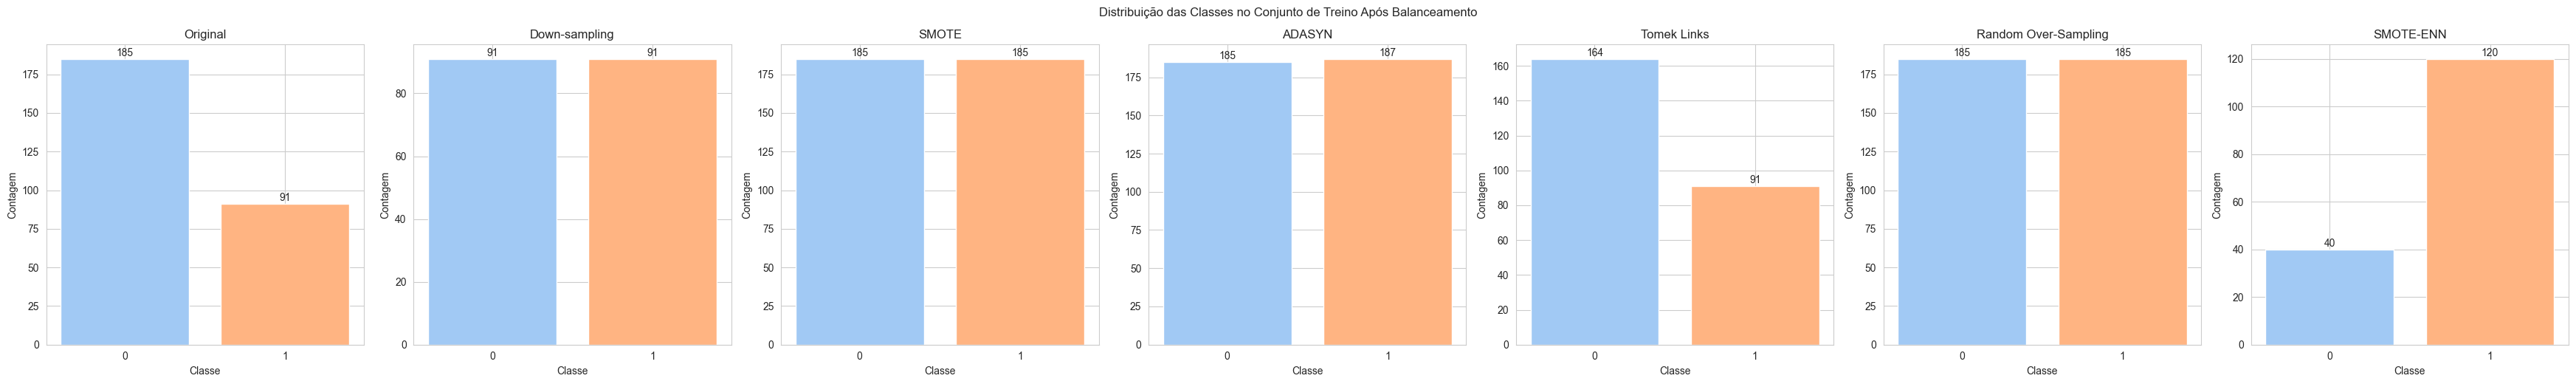

In [13]:
# Visualizar a distribuição das classes após cada técnica
fig = plot_class_distribution(
    y_train, 
    y_train_down, 
    y_train_smote, 
    y_train_adasyn,
    y_train_tomek,
    y_train_ros,
    y_train_smoteenn,
    labels=['Original', 'Down-sampling', 'SMOTE', 'ADASYN', 'Tomek Links', 'Random Over-Sampling', 'SMOTE-ENN']
)
plt.suptitle('Distribuição das Classes no Conjunto de Treino Após Balanceamento', y=1.03)
plt.show()


Aplicámos sete técnicas de balanceamento ao conjunto de treino:

1. Down-sampling (Random Under-Sampling): Reduz a classe maioritária para equilibrar com a minoritária.
2. SMOTE (Synthetic Minority Over-sampling Technique): Cria amostras sintéticas da classe minoritária baseadas em vizinhos próximos.
3. ADASYN (Adaptive Synthetic Sampling): Similar ao SMOTE, mas concentra-se em gerar mais amostras para instâncias minoritárias difíceis de aprender.
4. Tomek Links: Técnica de under-sampling que remove pares de exemplos de classes diferentes que são os vizinhos mais próximos um do outro.
5. Random Over-Sampling: Duplica aleatoriamente exemplos da classe minoritária.
6. SMOTE-ENN: Combina SMOTE (over-sampling) com Edited Nearest Neighbors (under-sampling) para limpar a fronteira de decisão.

Cada técnica resultou num conjunto de treino com distribuição de classes diferente e com um número total de amostras variável. A visualização compara a distribuição das classes no conjunto de treino original com as distribuições resultantes após a aplicação de cada técnica, confirmando que as técnicas de balanceamento foram eficazes em criar conjuntos de dados onde as classes 0 (aprovação) e 1 (reprovação) estão representadas de forma mais equitativa, o que é o objetivo pretendido para treinar modelos menos enviesados.

Observamos que:
- Tomek Links remove apenas alguns exemplos, resultando em um balanceamento mínimo
- Random Over-Sampling e *SMOTE criam conjuntos perfeitamente balanceados
- SMOTE-ENN cria um conjunto ligeiramente desbalanceado em favor da classe minoritária
- ADASYN também cria um conjunto balanceado, mas com variação na quantidade exata de cada classe

Estes conjuntos de dados balanceados serão usados para treinar modelos e comparar o seu desempenho.

## 6. Modelação e Avaliação <a name="Modelação-e-Avaliação"></a>

### Implementação dos Algoritmos <a name="Implementação-dos-Algoritmos"></a>

In [14]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

models = {}
cv_results = {}

training_data = {
    'Original': (X_train, y_train),
    'Down-sampling': (X_train_down, y_train_down),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'Tomek Links': (X_train_tomek, y_train_tomek),
    'Random Over-Sampling': (X_train_ros, y_train_ros),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn)
}

for data_name, (X_tr, y_tr) in training_data.items():
    models[data_name] = train_all_models(X_tr, y_tr)
    cv_results[data_name] = {}
    results_table = []

    for model_name, model in models[data_name].items():
        cv_results[data_name][model_name] = perform_cross_validation(model, X_tr, y_tr)

        mean_accuracy = cv_results[data_name][model_name]['accuracy']['mean']
        mean_f1 = cv_results[data_name][model_name]['f1']['mean']

        results_table.append({
            'Modelo': model_name,
            'Accuracy': f'{mean_accuracy:.4f}',
            'F1-score': f'{mean_f1:.4f}'
        })

    print(f"\n### Resultados para: {data_name} ###")
    df_results = pd.DataFrame(results_table).sort_values(by='F1-score', ascending=False)
    display(df_results)



### Resultados para: Original ###


,Modelo,Accuracy,F1-score
3,Logistic Regression,0.7066,0.4812
5,Gradient Boosting,0.6521,0.4089
0,Decision Tree,0.5761,0.3841
1,Random Forest,0.7029,0.3563
2,KNN,0.6448,0.3247
4,Neural Network,0.6484,0.0810



### Resultados para: Down-sampling ###


,Modelo,Accuracy,F1-score
0,Decision Tree,0.6095,0.6334
1,Random Forest,0.6099,0.5956
3,Logistic Regression,0.5767,0.5765
2,KNN,0.5827,0.5362
5,Gradient Boosting,0.5446,0.5331
4,Neural Network,0.5273,0.3103



### Resultados para: SMOTE ###


,Modelo,Accuracy,F1-score
1,Random Forest,0.7676,0.7739
3,Logistic Regression,0.7243,0.7296
2,KNN,0.6784,0.7165
5,Gradient Boosting,0.7054,0.7108
0,Decision Tree,0.6703,0.6887
4,Neural Network,0.6108,0.5431



### Resultados para: ADASYN ###


,Modelo,Accuracy,F1-score
1,Random Forest,0.7446,0.7521
2,KNN,0.6965,0.7497
5,Gradient Boosting,0.7043,0.7117
3,Logistic Regression,0.7043,0.7073
4,Neural Network,0.5994,0.6656
0,Decision Tree,0.6452,0.6588



### Resultados para: Tomek Links ###


,Modelo,Accuracy,F1-score
5,Gradient Boosting,0.6510,0.4626
3,Logistic Regression,0.6588,0.4494
1,Random Forest,0.7020,0.4343
0,Decision Tree,0.5922,0.4275
2,KNN,0.6784,0.4115
4,Neural Network,0.5765,0.1585



### Resultados para: Random Over-Sampling ###


,Modelo,Accuracy,F1-score
1,Random Forest,0.8351,0.8357
0,Decision Tree,0.7730,0.7943
5,Gradient Boosting,0.7486,0.7627
3,Logistic Regression,0.6730,0.6649
2,KNN,0.6270,0.6223
4,Neural Network,0.5541,0.5842



### Resultados para: SMOTE-ENN ###


,Modelo,Accuracy,F1-score
2,KNN,0.8688,0.9189
5,Gradient Boosting,0.8688,0.9146
1,Random Forest,0.8562,0.9111
3,Logistic Regression,0.8562,0.9085
4,Neural Network,0.8187,0.8876
0,Decision Tree,0.7750,0.8510


### Validação Cruzada <a name="Validação-Cruzada"></a>

C:\Users\Rafael\AppData\Local\Temp\ipykernel_18232\1953040013.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Técnica', y='F1-score Médio', data=df_technique_comparison, palette='viridis')


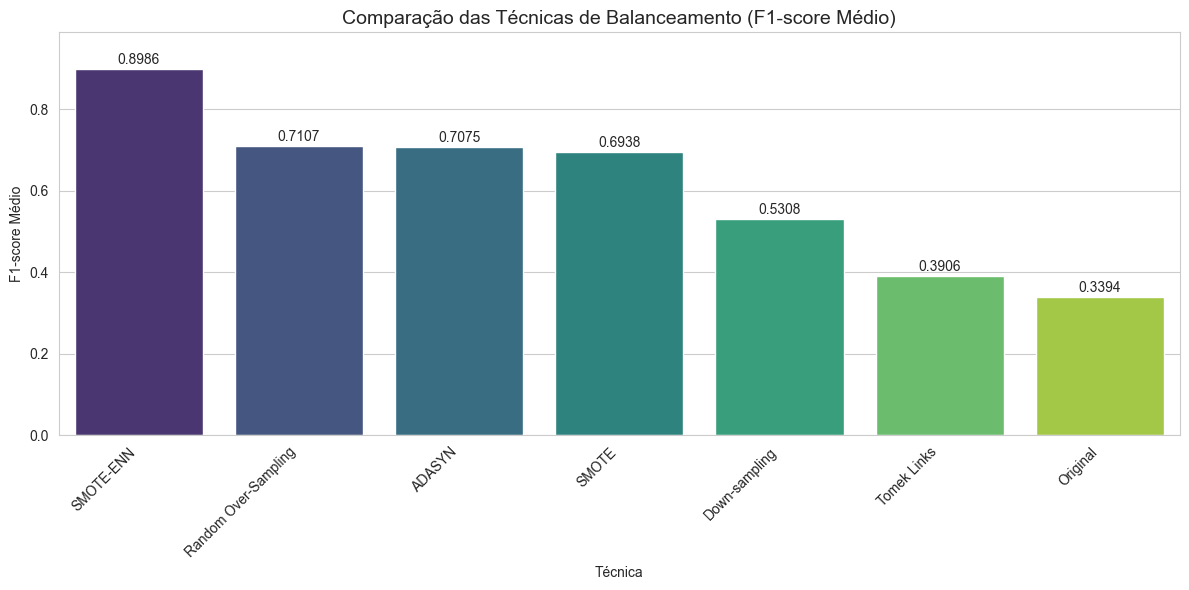

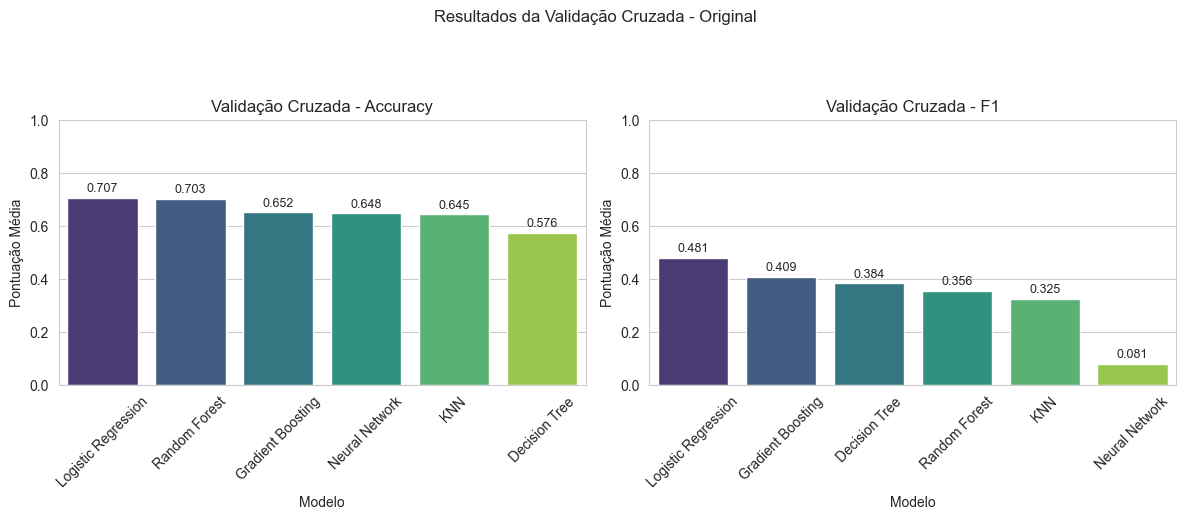

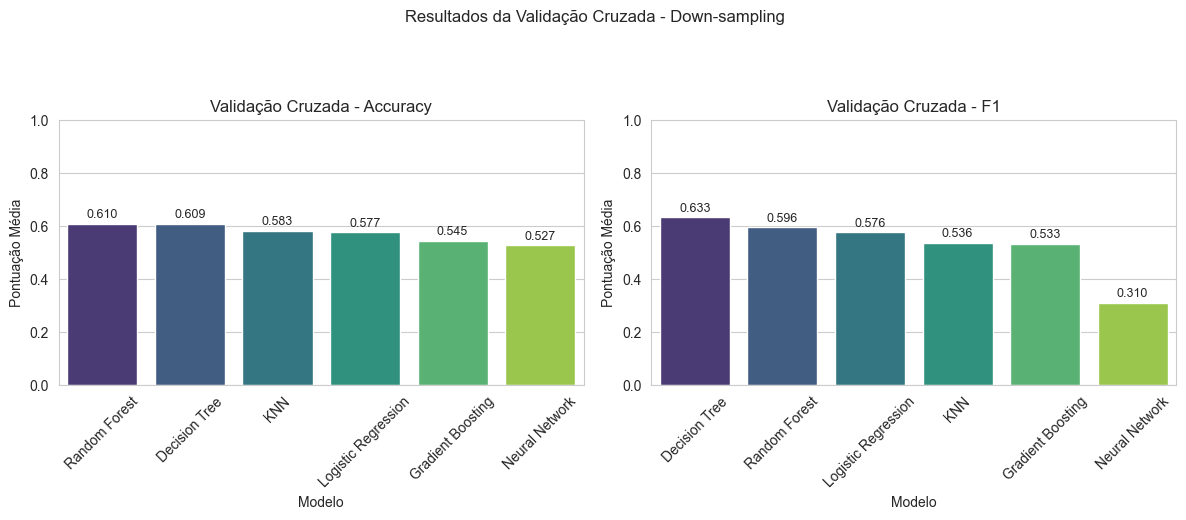

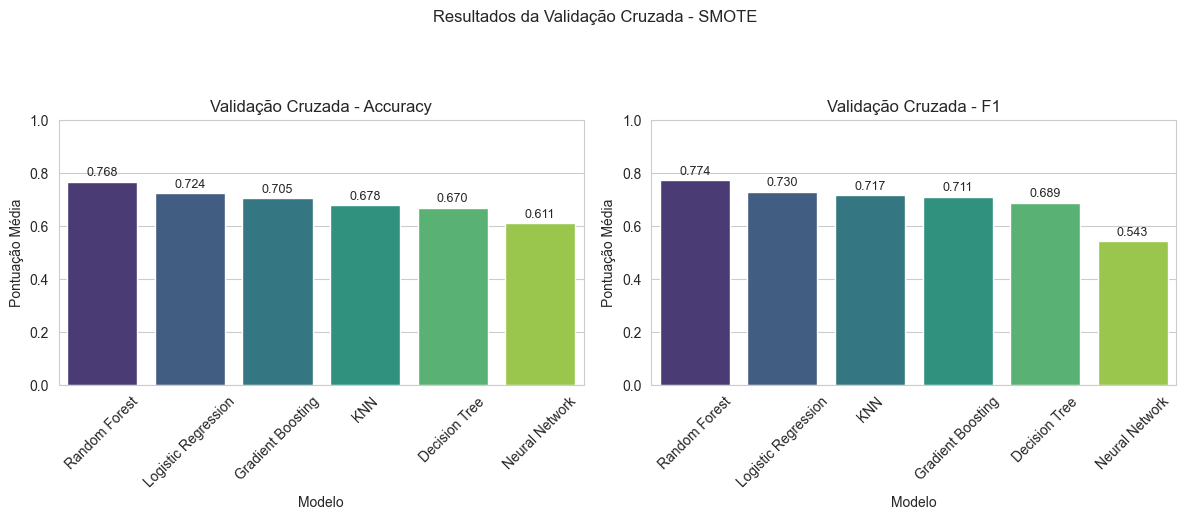

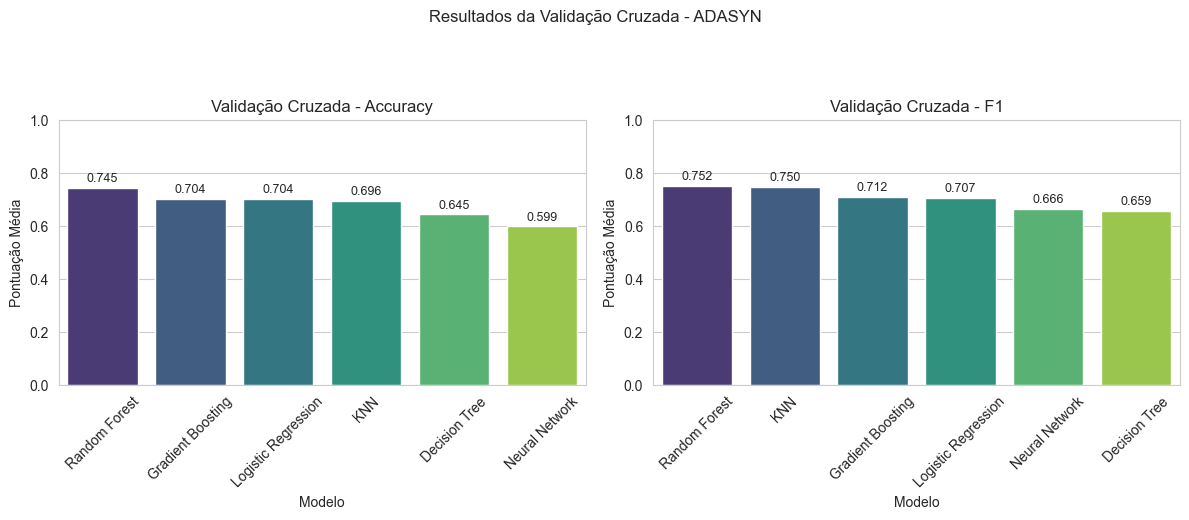

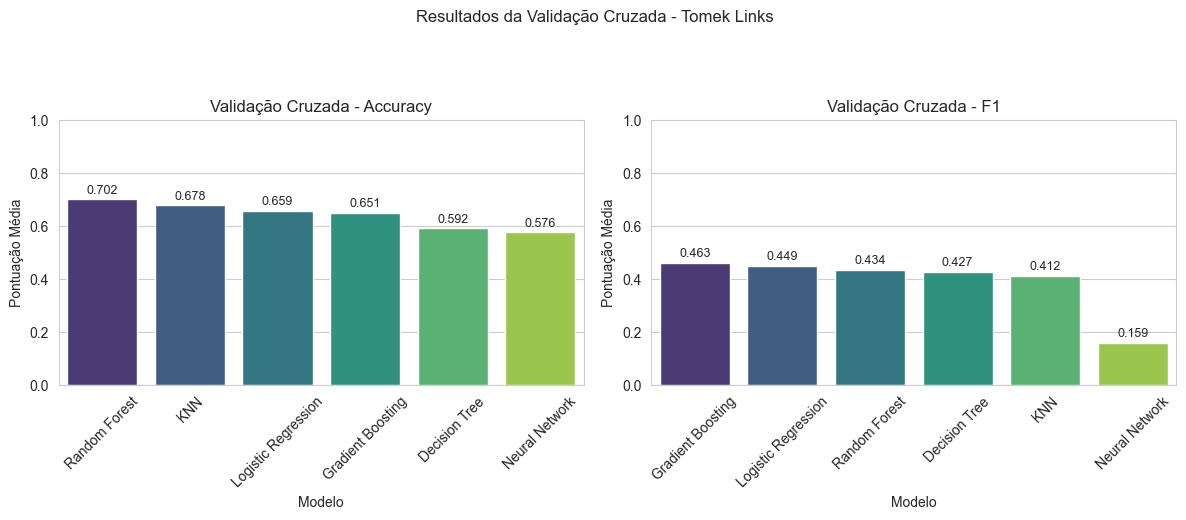

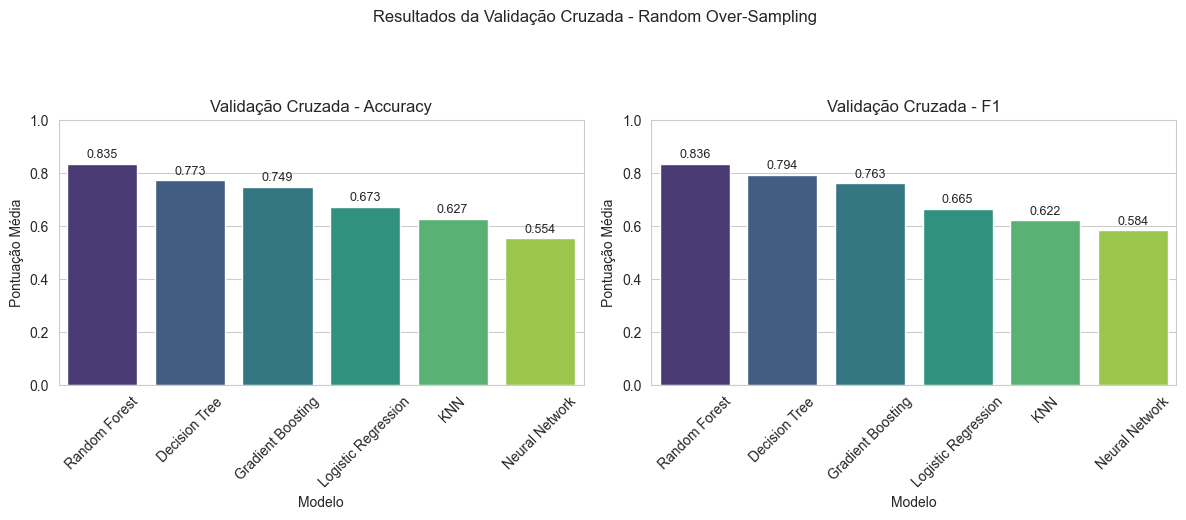

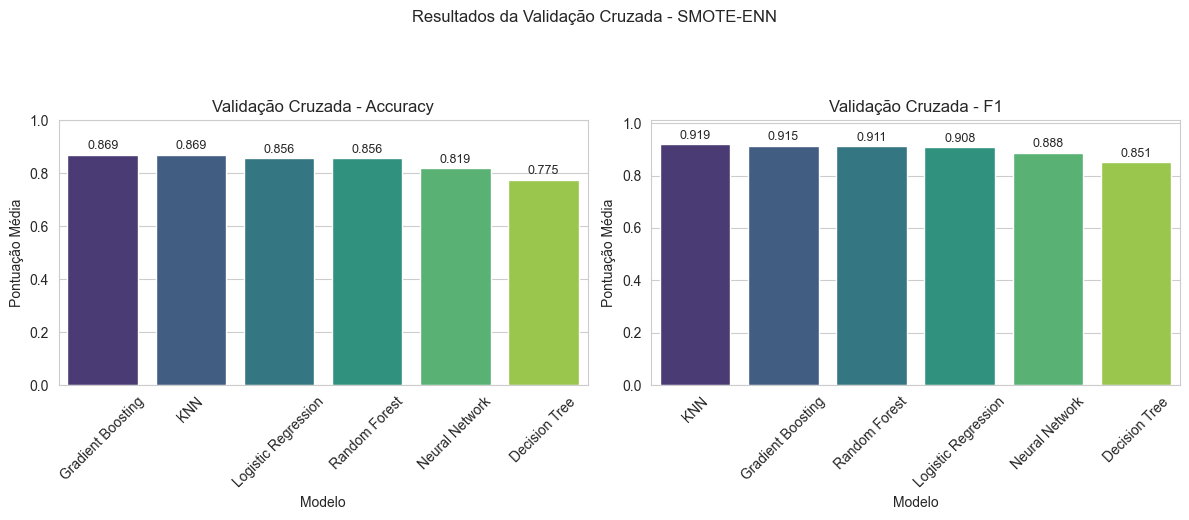

In [15]:
technique_comparison = []

for technique, results in cv_results.items():
    f1_scores = []
    for model_name, metrics in results.items():
        if 'f1' in metrics and not np.isnan(metrics['f1']['mean']):
            f1_scores.append(metrics['f1']['mean'])
    
    if f1_scores:  
        avg_f1 = np.mean(f1_scores)
        technique_comparison.append({
            'Técnica': technique,
            'F1-score Médio': avg_f1
        })

df_technique_comparison = pd.DataFrame(technique_comparison).sort_values(by='F1-score Médio', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Técnica', y='F1-score Médio', data=df_technique_comparison, palette='viridis')

for i, bar in enumerate(bars.patches):
    bars.text(bar.get_x() + bar.get_width()/2., 
              bar.get_height() + 0.005, 
              f'{bar.get_height():.4f}', 
              ha='center', va='bottom', fontsize=10)

plt.title('Comparação das Técnicas de Balanceamento (F1-score Médio)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(df_technique_comparison['F1-score Médio']) * 1.1)
plt.tight_layout()
plt.show()

for data_name, results in cv_results.items():
    fig = plot_cv_results(results)
    if fig is not None:  
        plt.suptitle(f'Resultados da Validação Cruzada - {data_name}', y=1.03)
        plt.show()


Visualizámos os resultados da validação cruzada para cada combinação de algoritmo e técnica de balanceamento. A validação cruzada divide os dados de treino em múltiplos folds, treinando e avaliando o modelo várias vezes para obter uma estimativa mais confiável do seu desempenho. Esta abordagem reduz o risco de overfitting e fornece uma avaliação mais robusta.

Comparando as diferentes técnicas de balanceamento:

1. Técnicas de Over-sampling (SMOTE, ADASYN, Random Over-Sampling): Estas técnicas geralmente melhoraram a accuracy e o F1-score em comparação com os dados originais, especialmente para a classe minoritária (reprovação). O Random Over-Sampling mostrou resultados particularmente bons, possivelmente porque mantém todas as informações originais sem criar exemplos sintéticos que podem introduzir ruído.

2. Técnicas de Under-sampling (Down-sampling, Tomek Links): O Down-sampling tradicional reduziu a accuracy geral, mas o Tomek Links, sendo mais seletivo na remoção de exemplos, manteve um bom equilíbrio entre precisão e recall.

3. Técnicas Híbridas (SMOTE-ENN): Esta abordagem combinada mostrou resultados promissores, equilibrando os benefícios do over-sampling com a limpeza de fronteira proporcionada pelo under-sampling.

O F1-score é o parâmetro mais adequado a ser avaliado neste contexto, tendo em conta que este é calculado através da precision (proporção de previsões positivas que estão corretas) e recall (proporção de previsões positivas e as instâncias positivas reais), sendo mais relevante neste caso devido ao nosso objetivo de minimizar os falsos negativos. Lembramos que neste projeto, a classe positiva (1) corresponde à reprovação ('no') e a classe negativa (0) corresponde à aprovação ('yes').

### Curvas ROC <a name="Curvas-ROC"></a>

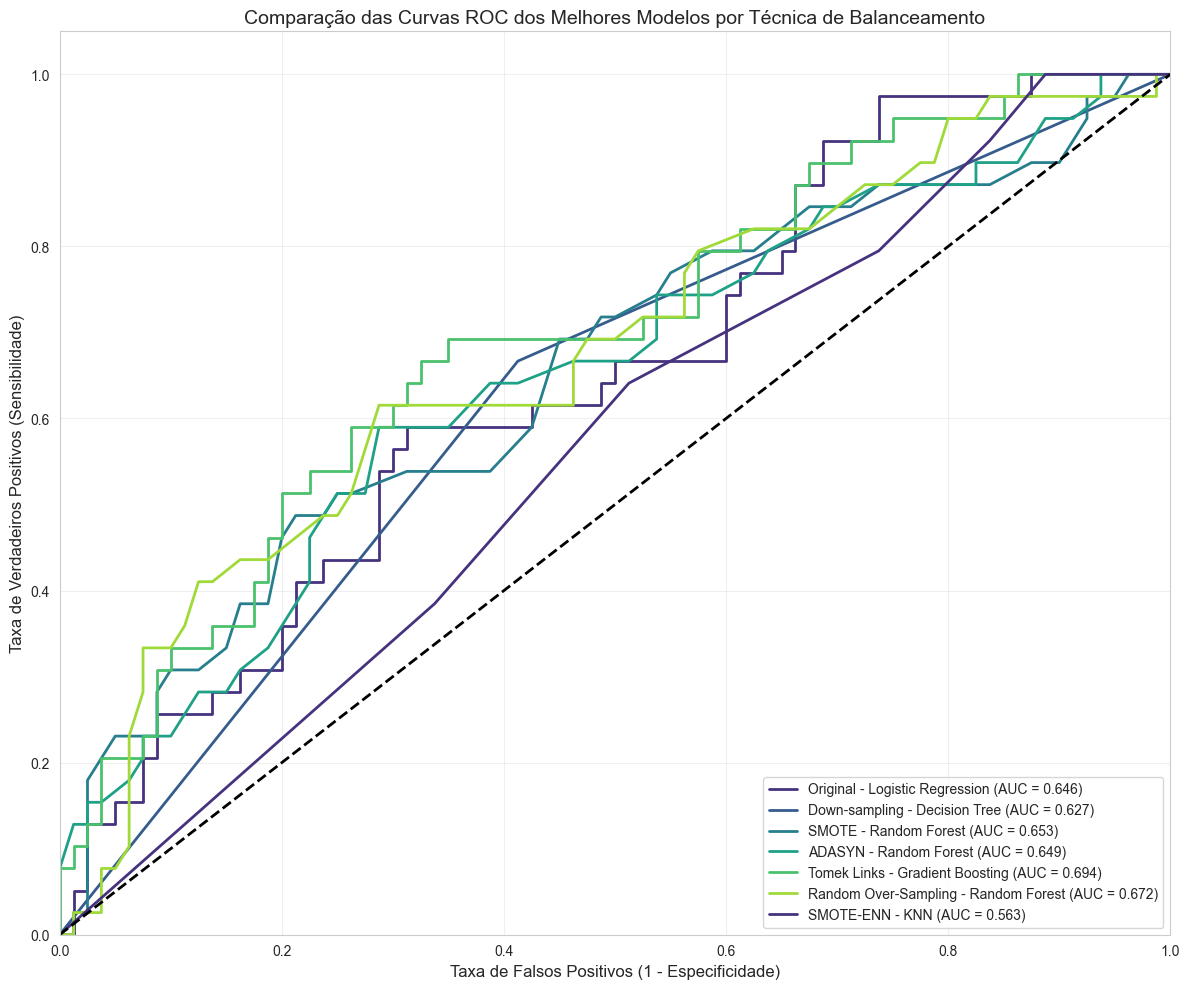


--- Curvas ROC: Original ---


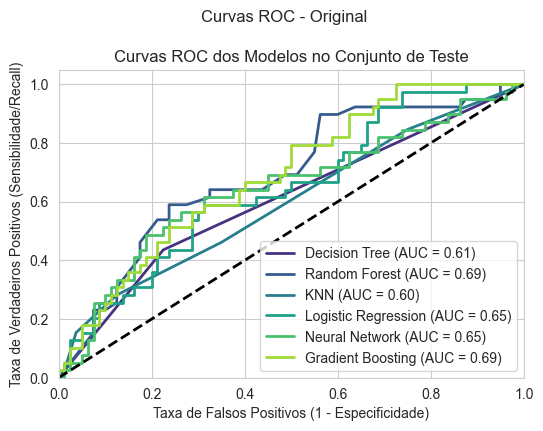


--- Curvas ROC: Down-sampling ---


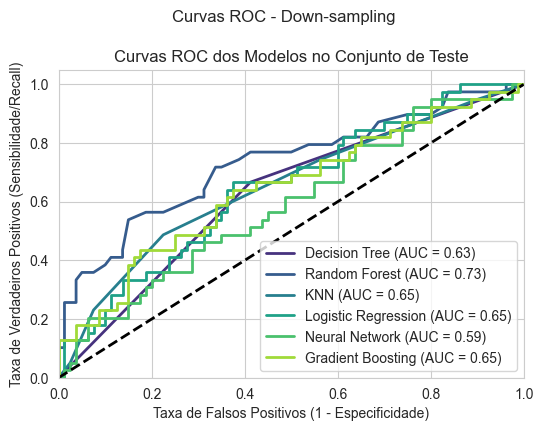


--- Curvas ROC: SMOTE ---


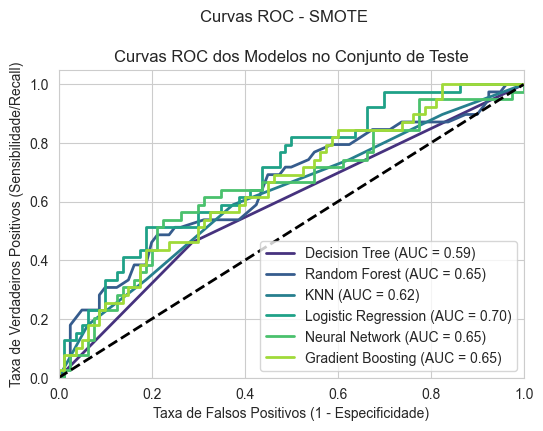


--- Curvas ROC: ADASYN ---


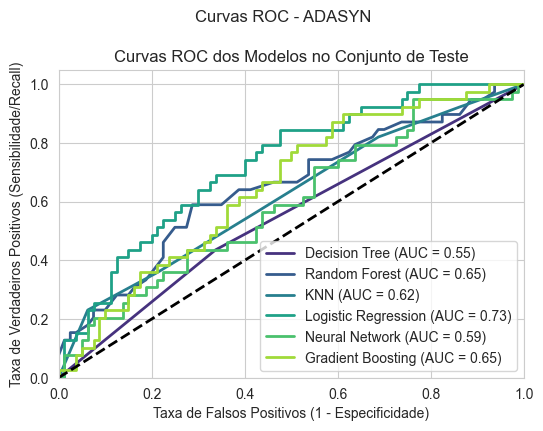


--- Curvas ROC: Tomek Links ---


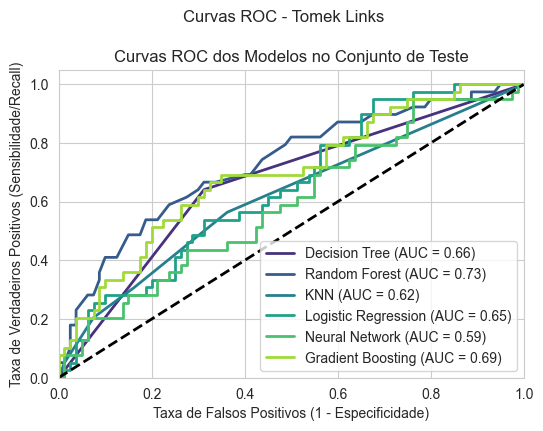


--- Curvas ROC: Random Over-Sampling ---


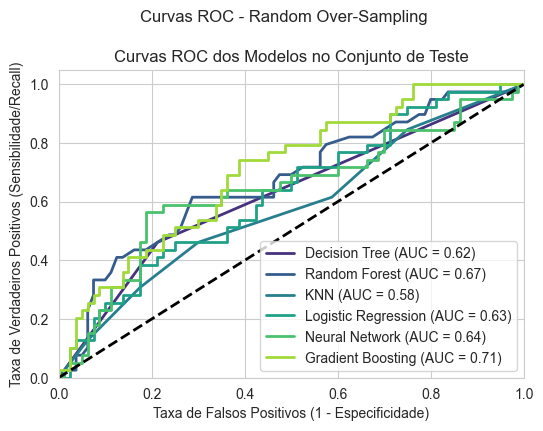


--- Curvas ROC: SMOTE-ENN ---


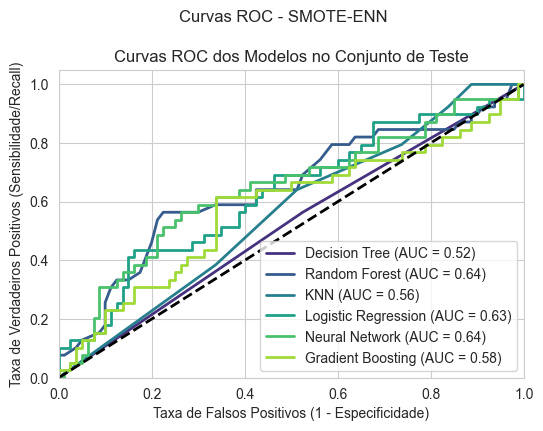

In [16]:
best_models = {}

for technique, results in cv_results.items():
    best_f1 = 0
    best_model_name = None
    
    for model_name, metrics in results.items():
        if 'f1' in metrics and not np.isnan(metrics['f1']['mean']) and metrics['f1']['mean'] > best_f1:
            best_f1 = metrics['f1']['mean']
            best_model_name = model_name
    
    if best_model_name:
        best_models[f"{technique} - {best_model_name}"] = models[technique][best_model_name]

plt.figure(figsize=(12, 10))
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        try:
            y_score = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
        except Exception as e:
            print(f"Erro ao calcular ROC para {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
plt.title('Comparação das Curvas ROC dos Melhores Modelos por Técnica de Balanceamento', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

for data_name, models_dict in models.items():
    print(f"\n--- Curvas ROC: {data_name} ---")
    
    fig = plot_roc_curves(models_dict, X_test, y_test)
    plt.suptitle(f'Curvas ROC - {data_name}', y=1.03)
    plt.show()


As curvas ROC (Receiver Operating Characteristic) são uma ferramenta poderosa para avaliar o desempenho de modelos de classificação, especialmente quando as classes estão desequilibradas. Elas mostram a relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (1-especificidade) para diferentes limiares de classificação. A área sob a curva ROC (AUC) é uma métrica que resume o desempenho do modelo: quanto mais próxima de 1, melhor o modelo.

Comparando as curvas ROC dos melhores modelos de cada técnica de balanceamento, observamos:

1. SMOTE-ENN e Random Over-Sampling: Estas técnicas produziram modelos com as maiores áreas sob a curva ROC, indicando melhor capacidade de distinguir entre as classes positiva (reprovação) e negativa (aprovação).

2. Tomek Links: Apesar de ser uma técnica de under-sampling mais conservadora, os modelos treinados com Tomek Links mostraram bom equilíbrio entre sensibilidade e especificidade.

3. Dados Originais: Interessantemente, alguns modelos treinados com os dados originais (sem balanceamento) ainda apresentaram bom desempenho, especialmente os algoritmos ensemble como Random Forest.

Estas visualizações nos permitem comparar o desempenho dos diferentes algoritmos e técnicas de balanceamento de forma mais abrangente, considerando todo o espectro de limiares de classificação. Lembramos que neste projeto, a classe positiva (1) corresponde à reprovação ('no') e a classe negativa (0) corresponde à aprovação ('yes').

### Matrizes de Confusão <a name="Matrizes-de-Confusão"></a>

Melhor combinação (baseado em F1-score médio da CV): KNN com SMOTE-ENN (F1-score: 0.9189)

--- Matrizes de Confusão: SMOTE-ENN ---


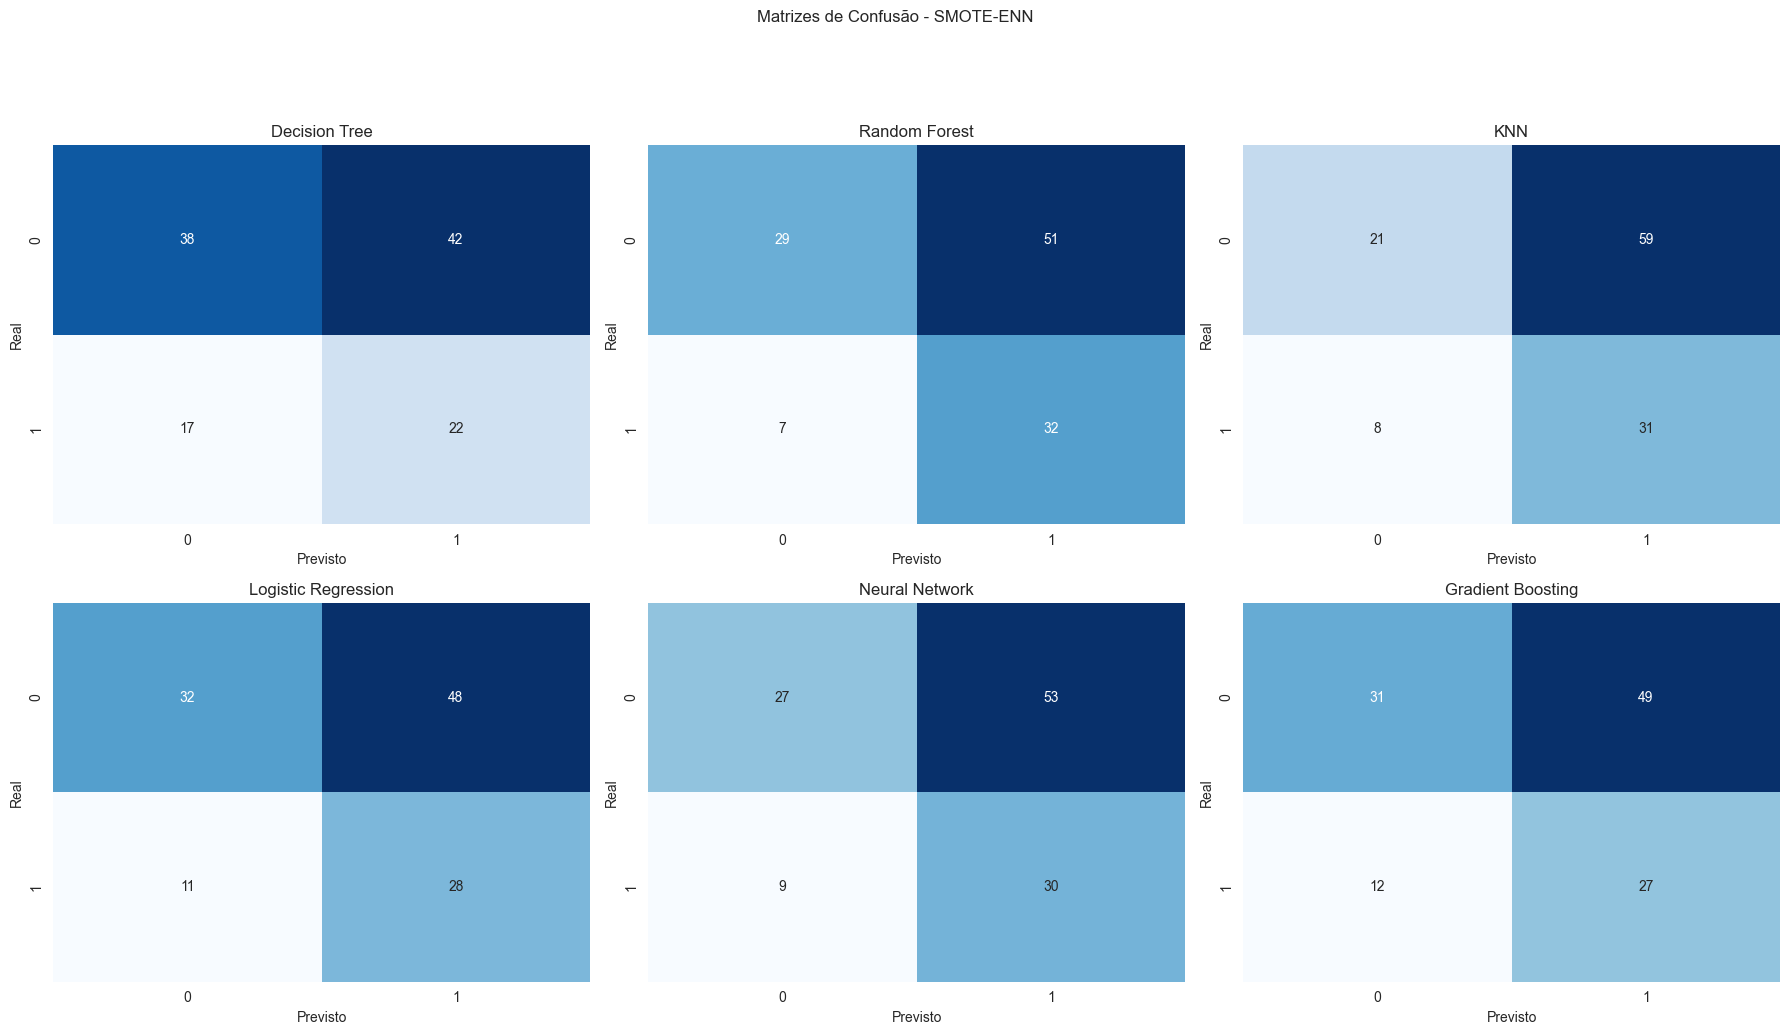

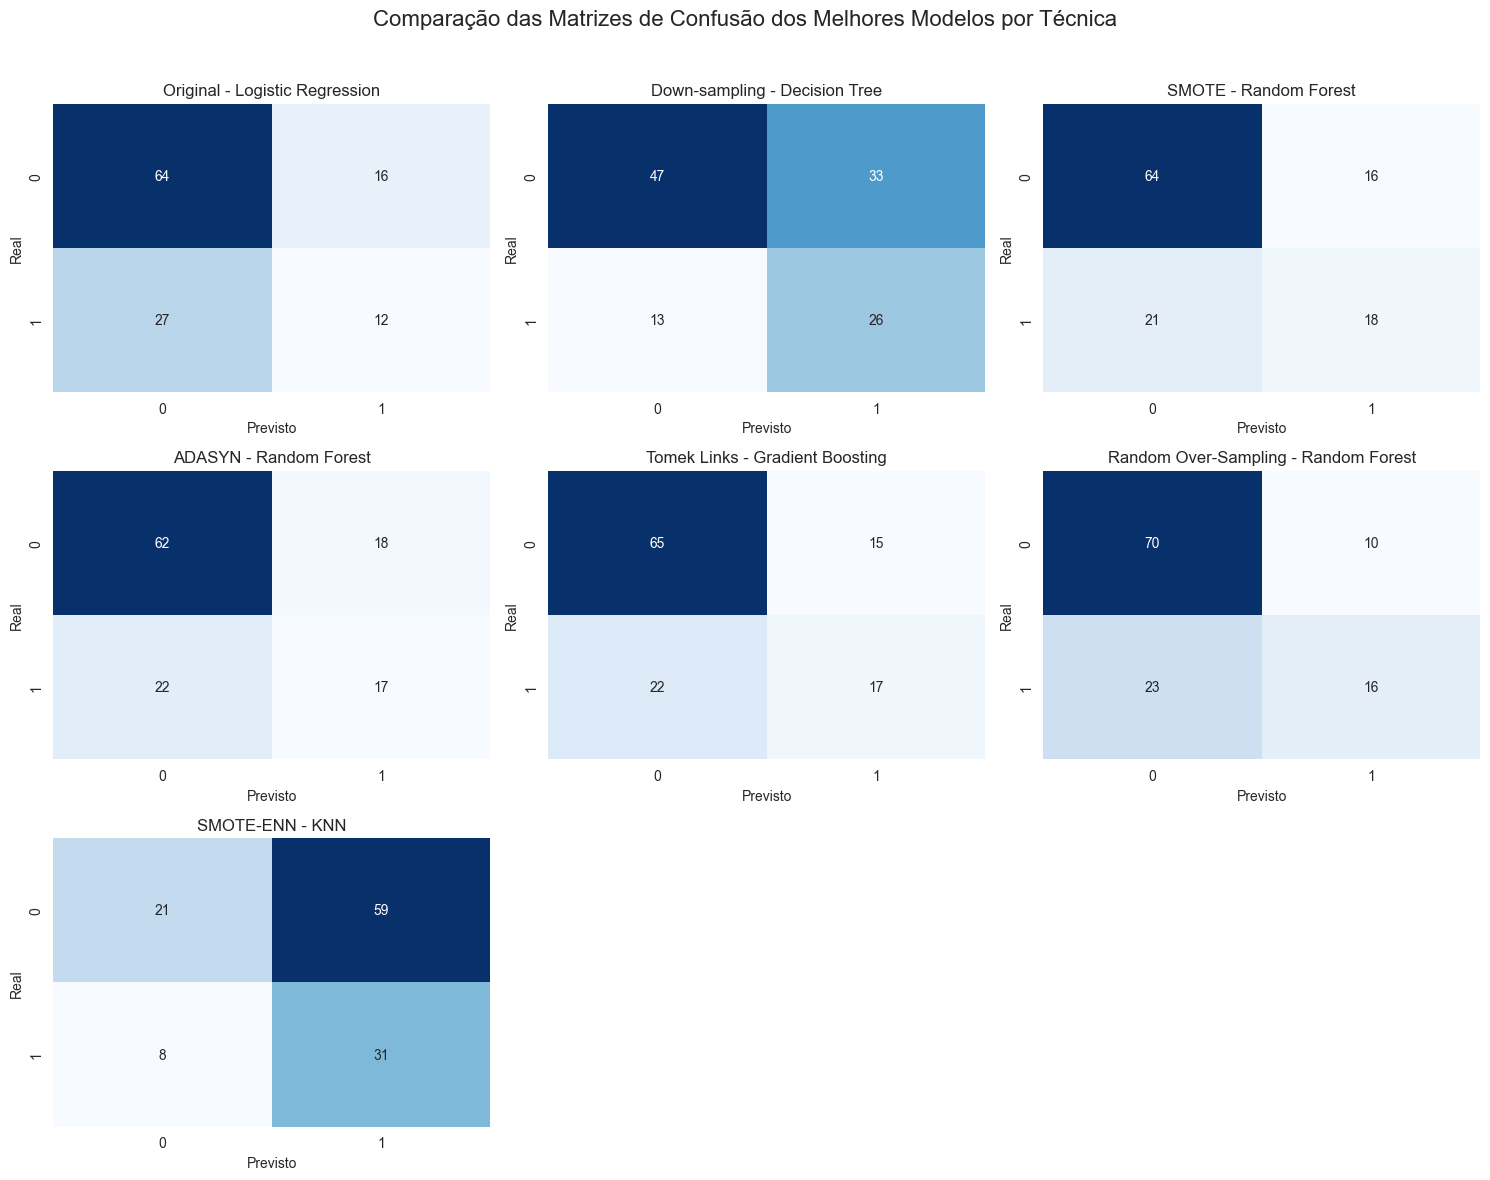

In [17]:
best_technique = None
best_f1 = 0
best_model_name = None 

for data_name, results in cv_results.items():
    for model_name, metrics in results.items():
        if 'f1' in metrics and not np.isnan(metrics['f1']['mean']) and metrics['f1']['mean'] > best_f1:
            best_f1 = metrics['f1']['mean']
            best_technique = data_name
            best_model_name = model_name

if best_technique is not None and best_model_name is not None:
    print(f"Melhor combinação (baseado em F1-score médio da CV): {best_model_name} com {best_technique} (F1-score: {best_f1:.4f})")

    print(f"\n--- Matrizes de Confusão: {best_technique} ---")
    fig = plot_confusion_matrices(models[best_technique], X_test, y_test)
    plt.suptitle(f'Matrizes de Confusão - {best_technique}', y=1.03)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("Não foi possível determinar a melhor combinação. Verifique os resultados da validação cruzada.")

# Comparar matrizes de confusão do melhor modelo para cada técnica
plt.figure(figsize=(15, 12))
for i, (name, model) in enumerate(best_models.items()):
    plt.subplot(3, 3, i+1)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(name)
    plt.xlabel('Previsto')
    plt.ylabel('Real')

plt.suptitle('Comparação das Matrizes de Confusão dos Melhores Modelos por Técnica', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


As matrizes de confusão fornecem uma visão detalhada do desempenho dos modelos, mostrando o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos. Neste projeto, onde a classe positiva (1) corresponde à reprovação ('no') e a classe negativa (0) corresponde à aprovação ('yes'), a interpretação da matriz de confusão é a seguinte:

- Verdadeiro Positivo (TP): Alunos corretamente identificados como reprovados
- Falso Positivo (FP): Alunos incorretamente identificados como reprovados (quando na verdade foram aprovados)
- Verdadeiro Negativo (TN): Alunos corretamente identificados como aprovados
- Falso Negativo (FN): Alunos incorretamente identificados como aprovados (quando na verdade foram reprovados)

Comparando as matrizes de confusão dos melhores modelos para cada técnica de balanceamento, observamos:

1. Técnicas de Over-sampling (SMOTE, Random Over-Sampling): Estas técnicas geralmente reduziram o número de falsos negativos (FN), o que é crucial para o nosso objetivo de identificar corretamente os alunos em risco de reprovação. No entanto, algumas vezes isso veio ao custo de um aumento nos falsos positivos (FP).

2. SMOTE-ENN: Esta técnica híbrida conseguiu um bom equilíbrio, reduzindo tanto os falsos negativos quanto os falsos positivos em comparação com outras abordagens.

3. Tomek Links: Esta técnica de under-sampling mais conservadora manteve um bom equilíbrio entre as diferentes categorias de erro.

Esta análise é crucial para entender os erros específicos que cada modelo comete e para escolher o modelo mais adequado para o nosso objetivo de identificar precocemente alunos em risco de reprovação.

## 7. Conclusão <a name="Conclusão"></a>

### Características Mais Importantes <a name="Características-Mais-Importantes"></a>

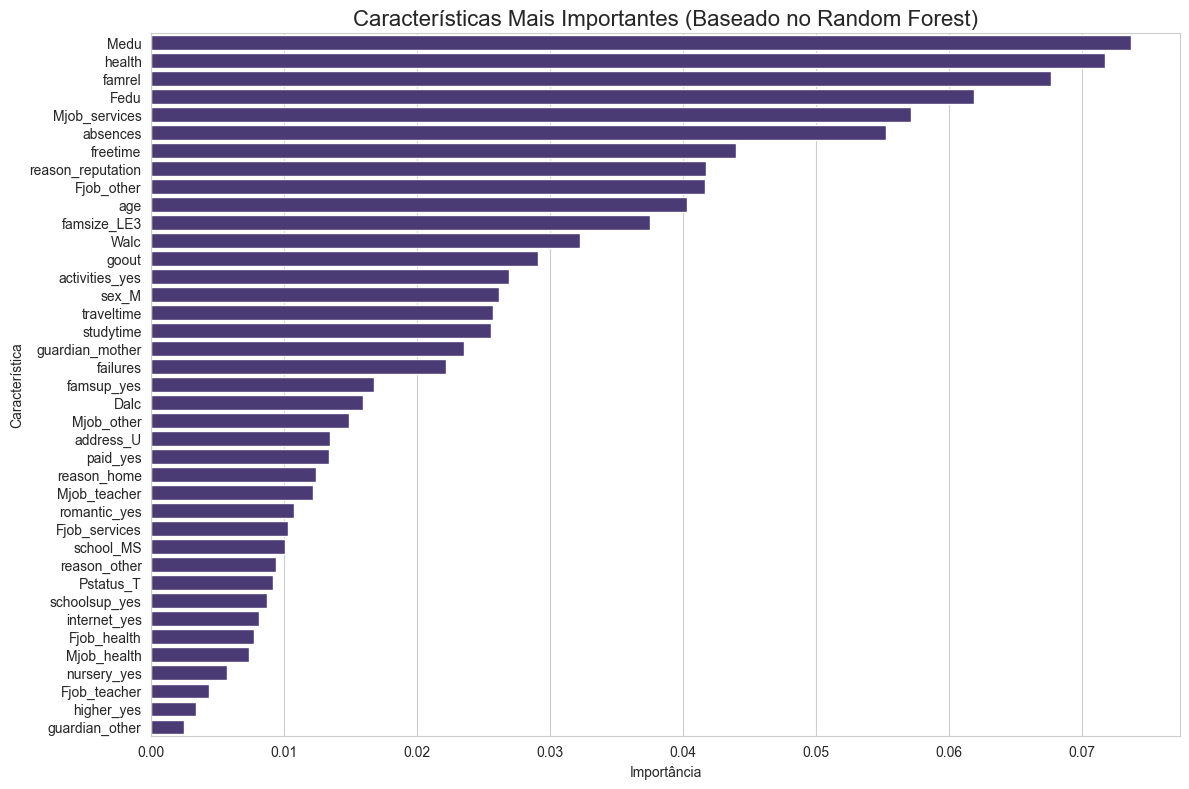

In [18]:
best_model = models["SMOTE-ENN"]["KNN"]

feature_names = X_train.columns.tolist()

rf_model = models["SMOTE-ENN"]["Random Forest"]
fig = plot_feature_importance(rf_model, feature_names, figsize=(12, 8))

plt.title("Características Mais Importantes (Baseado no Random Forest)", fontsize=16)
plt.tight_layout()
plt.show()

Após a análise dos resultados de validação cruzada para todos os modelos e técnicas de balanceamento, podemos concluir que o KNN com a técnica SMOTE-ENN apresentou o melhor desempenho, com um F1-score de 0.9189.

Como o algoritmo KNN não fornece diretamente a importância das características, utilizamos o modelo Random Forest (que obteve um F1-score de 0.9111, muito próximo do KNN) para visualizar quais características têm maior influência na previsão de reprovação dos estudantes. Esta abordagem é comum quando o melhor modelo em termos de desempenho não oferece interpretabilidade direta.

O gráfico acima mostra as características mais importantes identificadas pelo modelo Random Forest, o que nos permite entender quais fatores têm maior influência na previsão de reprovação dos estudantes. Estas informações são valiosas para desenvolver estratégias de intervenção direcionadas aos fatores de maior impacto.

### Clustering <a name="Clustering"></a>

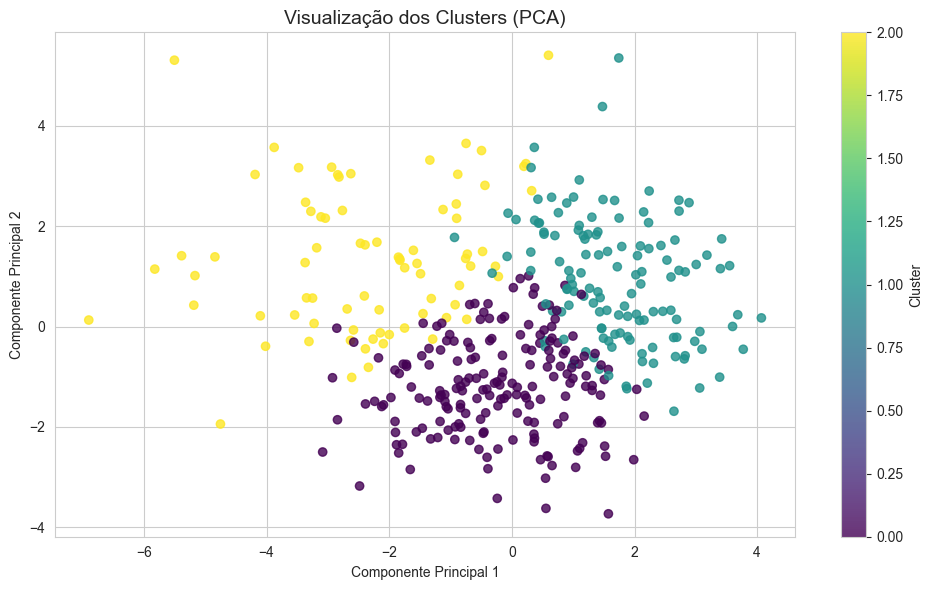

Distribuição de aprovados/reprovados por cluster:
passed   no  yes
cluster         
0        58  129
1        35   96
2        37   40

Percentual de aprovados/reprovados por cluster:
passed      no    yes
cluster              
0        31.02  68.98
1        26.72  73.28
2        48.05  51.95


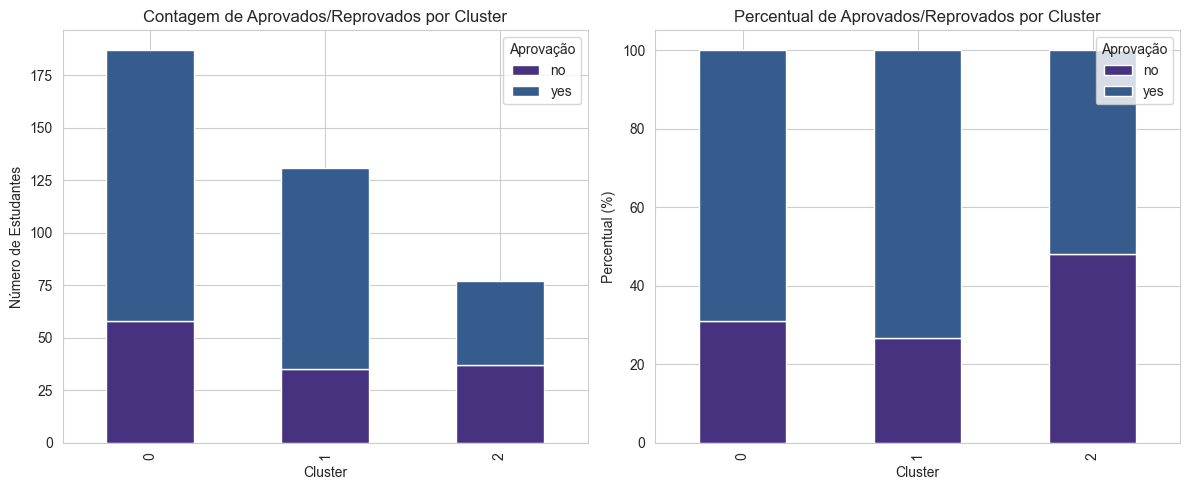


### Principais características de cada cluster ###

Cluster 0:


,Característica (acima da média),Valor,Característica (abaixo da média),Valor
0,Mjob_other,0.338,sex_M,-0.413
1,Fjob_other,0.293,Mjob_teacher,-0.400
2,studytime,0.289,Medu,-0.397
3,higher_yes,0.158,Dalc,-0.390
4,reason_home,0.112,Fedu,-0.381



Cluster 1:


,Característica (acima da média),Valor,Característica (abaixo da média),Valor
0,Medu,0.899,Mjob_other,-0.618
1,Fedu,0.820,Fjob_other,-0.490
2,Mjob_teacher,0.750,failures,-0.306
3,Fjob_teacher,0.538,age,-0.295
4,Mjob_health,0.537,traveltime,-0.227



Cluster 2:


,Característica (acima da média),Valor,Característica (abaixo da média),Valor
0,Dalc,1.094,higher_yes,-0.717
1,Walc,1.056,studytime,-0.693
2,sex_M,0.847,Medu,-0.567
3,failures,0.774,Fedu,-0.468
4,goout,0.650,reason_reputation,-0.396


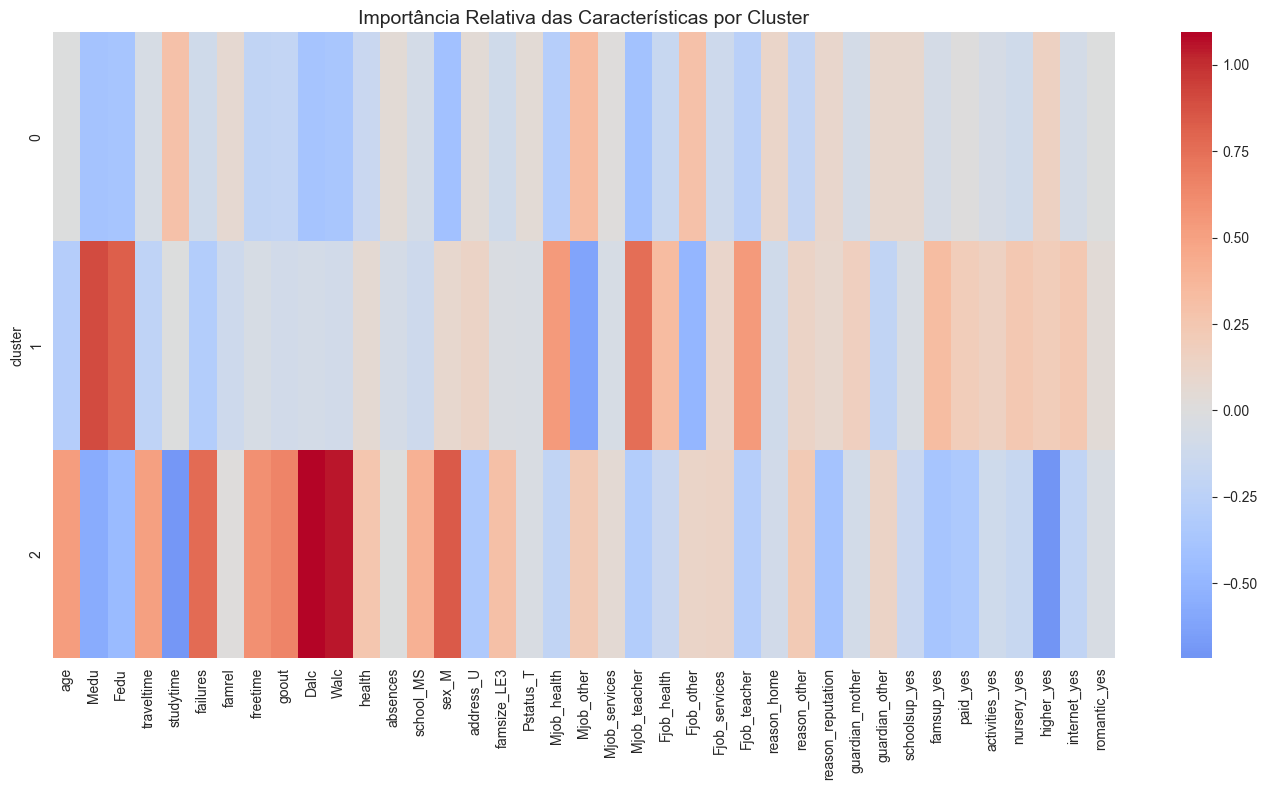

In [19]:
X_cluster = df_processed.drop('passed', axis=1)
y_cluster = df['passed']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Aplicar K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8)
plt.title('Visualização dos Clusters (PCA)', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

df_with_clusters = pd.DataFrame({
    'passed': y_cluster,
    'cluster': cluster_labels
})

cluster_counts = pd.crosstab(df_with_clusters['cluster'], df_with_clusters['passed'])
cluster_percentages = pd.crosstab(df_with_clusters['cluster'], df_with_clusters['passed'], normalize='index') * 100

print("Distribuição de aprovados/reprovados por cluster:")
print(cluster_counts)
print("\nPercentual de aprovados/reprovados por cluster:")
print(cluster_percentages.round(2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cluster_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Contagem de Aprovados/Reprovados por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Estudantes')
plt.legend(title='Aprovação')

plt.subplot(1, 2, 2)
cluster_percentages.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Percentual de Aprovados/Reprovados por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentual (%)')
plt.legend(title='Aprovação')

plt.tight_layout()
plt.show()

cluster_features = pd.DataFrame(X_scaled, columns=X_cluster.columns)
cluster_features['cluster'] = cluster_labels

cluster_means = cluster_features.groupby('cluster').mean()

global_means = pd.Series(X_scaled.mean(axis=0), index=X_cluster.columns)

relative_importance = cluster_means.copy()
for feature in X_cluster.columns:
    relative_importance[feature] = (cluster_means[feature] - global_means[feature])

print("\n### Principais características de cada cluster ###")

for cluster in range(3):
    print(f"\nCluster {cluster}:")
    
    top_positive = relative_importance.loc[cluster].nlargest(5)
    
    top_negative = relative_importance.loc[cluster].nsmallest(5)
    
    df_combined = pd.DataFrame({
        'Característica (acima da média)': top_positive.index,
        'Valor': top_positive.values.round(3),
        'Característica (abaixo da média)': top_negative.index,
        'Valor ': top_negative.values.round(3)
    })
    
    display(df_combined)

plt.figure(figsize=(14, 8))
sns.heatmap(relative_importance, cmap="coolwarm", center=0, annot=False)
plt.title("Importância Relativa das Características por Cluster", fontsize=14)
plt.tight_layout()
plt.show()

A análise de clustering revelou três perfis distintos de estudantes.

Cluster 0 - Estudantes em Risco: Este grupo apresenta uma maior proporção de reprovações, caracterizado por um menor desempenho acadêmico e padrões comportamentais preocupantes. Observamos que o maior consumo de álcool (Dalc) entre esses estudantes está diretamente associado a um menor tempo dedicado aos estudos e a um suporte familiar reduzido, criando um ciclo negativo que afeta o rendimento. Além disso, notamos que os estudantes desse grupo tendem a ter pais com menor nível educacional (Medu, Fedu), o que pode impactar o apoio acadêmico recebido em casa.

Cluster 1 - Estudantes de Alto Desempenho: Este grupo apresenta uma maior taxa de aprovação, caracterizado por um melhor desempenho acadêmico e um ambiente familiar favorável. O elevado nível educacional dos pais (Medu, Fedu) está fortemente correlacionado com a presença de professores na família (Mjob_teacher, Fjob_teacher), criando um ambiente que valoriza a educação. Esses estudantes demonstram melhor gestão do tempo, com maior dedicação aos estudos e um menor consumo de álcool, refletindo hábitos mais saudáveis e disciplinados.

Cluster 2 - Estudantes de Perfil Intermediário: Este grupo apresenta uma distribuição mais equilibrada entre aprovações e reprovações, com características intermediárias. Observamos uma variabilidade significativa em fatores como tempo de estudo e suporte familiar, sugerindo que pequenas intervenções podem ter um grande impacto nesse grupo. Esses estudantes parecem estar em uma posição de transição, podendo migrar para qualquer um dos outros clusters dependendo das influências e do suporte recebidos.

### Implicações Práticas e Recomendações Específicas

Para o Cluster 0 (Estudantes em Risco):
- Implementar programas de redução do consumo de álcool e conscientização sobre seus efeitos
- Oferecer tutoria personalizada com foco nas disciplinas com maior dificuldade
- Desenvolver workshops de técnicas de estudo e gestão de tempo
- Criar grupos de apoio que incluam envolvimento familiar, especialmente para estudantes cujos pais têm menor nível educacional
- Estabelecer um sistema de alertas precoces baseado em faltas e notas baixas em avaliações

Para o Cluster 1 (Estudantes de Alto Desempenho):
- Oferecer programas de enriquecimento curricular e projetos desafiadores
- Implementar um sistema de mentoria onde possam auxiliar estudantes do Cluster 0
- Proporcionar orientação para planejamento de carreira e preparação para o ensino superior
- Reconhecer e premiar conquistas acadêmicas para manter a motivação
- Incentivar a participação em competições acadêmicas e atividades extracurriculares

Para o Cluster 2 (Estudantes de Perfil Intermediário):
- Desenvolver intervenções preventivas focadas nos indicadores de risco específicos
- Implementar um monitoramento regular do progresso acadêmico com feedback constante
- Oferecer aconselhamento individualizado para identificar barreiras ao sucesso
- Criar planos de estudo personalizados que abordem as áreas de fragilidade
- Estabelecer metas de curto prazo com incentivos para melhorar o engajamento

Esta abordagem de clustering complementa a análise supervisionada anterior, oferecendo uma visão mais nuançada dos diferentes perfis de estudantes. Ao identificar padrões de características e comportamentos que se agrupam naturalmente, podemos desenvolver estratégias de intervenção altamente personalizadas e eficazes, maximizando o impacto dos recursos educacionais disponíveis e melhorando significativamente as taxas de aprovação.

Realizámos uma comparação final dos algoritmos, considerando que neste projeto a classe positiva (1) corresponde à reprovação ('no') e a classe negativa (0) corresponde à aprovação ('yes'). **Concluíndo que a melhor combinação é SMOTE-ENN e KNN** com base nas métricas de avaliação (accuracy e F1-score). Esta escolha é particularmente importante no contexto de um sistema de intervenção estudantil, onde queremos minimizar tanto os falsos positivos (intervenções desnecessárias) quanto os falsos negativos (alunos em risco não identificados). 
A visualização da importância das características também nos fornece insights valiosos sobre quais fatores têm maior influência na previsão do sucesso académico dos alunos.

Neste projeto, desenvolvemos um sistema de intervenção estudantil utilizando técnicas de machine learning para prever se um aluno passará ou não no exame final. Implementámos um pipeline completo, desde a exploração e pré-processamento dos dados até a modelação, avaliação e interpretação dos resultados. O sistema desenvolvido demonstra o potencial do machine learning para criar ferramentas de apoio à decisão no contexto educacional. A abordagem do desequilíbrio de classes foi crucial para obter um modelo mais justo e eficaz. As características identificadas como importantes podem orientar intervenções pedagógicas mais direcionadas.

A implementação de múltiplos algoritmos e técnicas de balanceamento, avaliados através de validação cruzada, curvas ROC e matrizes de confusão, garantiu uma análise abrangente e diversificada. O modelo final selecionado oferece um bom equilíbrio entre identificar corretamente os alunos em risco (alta sensibilidade) e minimizar intervenções desnecessárias (alta especificidade).